<a href="https://colab.research.google.com/github/fede-14/Retine/blob/main/TASK_1!!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# DATASET DOWNLOAD

In [ ]:
import kagglehub

path = kagglehub.dataset_download("andrewmvd/ocular-disease-recognition-odir5k")

print("Path to dataset files:", path)

'''
possiamo decidere il numero di classi, sviluppare almeno 2 algoritmi di classificazione
per esempio algoritmo CNN e algoritmo estrazione delle features.
layer da aggiungere nelle reti neurali vantaggio e svantaggio nell'aggiungerlo, le sue caratteristiche
Keras libreria per deep learning per python, sviluppato da Google, più utilizzata per le immagini
PyTorch sviluppata da Facebook
si possono utilizzare insieme
'''



100%|██████████| 1.62G/1.62G [00:51<00:00, 33.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/ocular-disease-recognition-odir5k/versions/2


"\npossiamo decidere il numero di classi, sviluppare almeno 2 algoritmi di classificazione\nper esempio algoritmo CNN e algoritmo estrazione delle features.\nlayer da aggiungere nelle reti neurali vantaggio e svantaggio nell'aggiungerlo, le sue caratteristiche\nKeras libreria per deep learning per python, sviluppato da Google, più utilizzata per le immagini\nPyTorch sviluppata da Facebook\nsi possono utilizzare insieme\n"



---

# ORGANIZZAZIONE DATI E ANALISI HSV

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from scipy.stats import skew, kurtosis


immaginipath=path+"/preprocessed_images"
data=pd.read_csv(path+'/full_df.csv')
#print(np.shape(data))
#righe=print(len(data['N']))
#print(data['N'][1])

N, D, G, C, A, H, M, O = [], [], [], [], [], [], [], []

TOT = [N,D,G,C,A,H,M,O]
TOT_ = ['N','D','G','C','A','H','M','O']
#divisione delle immagini
for i in range(np.shape(data)[0]):
  if data['labels'][i]=="['N']":
    N.append(data['filename'][i])
  elif data['labels'][i]=="['D']":
    D.append(data['filename'][i])
  elif data['labels'][i]=="['G']":
    G.append(data['filename'][i])
  elif data['labels'][i]=="['C']":
    C.append(data['filename'][i])
  elif data['labels'][i]=="['A']":
    A.append(data['filename'][i])
  elif data['labels'][i]=="['H']":
    H.append(data['filename'][i])
  elif data['labels'][i]=="['M']":
    M.append(data['filename'][i])
  elif data['labels'][i]=="['O']":
    O.append(data['filename'][i])


def create_circular_mask(h, w, center=None, radius=None):
    """
    Crea una maschera circolare di dimensioni h x w.
    - center: (x, y) centro del cerchio. Se None, è il centro dell'immagine.
    - radius: raggio del cerchio. Se None, usa il più piccolo tra altezza/larghezza.
    """
    if center is None:
        center = (int(w/2), int(h/2))  # Centro dell'immagine
    if radius is None:
        radius = min(h, w) // 4  # Raggio di default

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    mask = dist_from_center <= radius
    return mask

results =[]
categories = {
    "N": N, "D": D, "G": G, "C": C,
    "A": A, "H": H, "M": M, "O": O
}

for category, images in categories.items():
  for file in images: #gira sulle immagini della malattia
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
    # Dimensioni dell'immagine
    h, w, _ = img.shape

    # Crea la maschera circolare
    center = (w // 2, h // 2)  # Centro dell'immagine
    radius = 256  # Raggio del cerchio
    circular_mask = create_circular_mask(h, w, center=center, radius=radius)

    # Applica la maschera al canale H
    img_circular = img[circular_mask]

    # Calcola le statistiche sui pixel della patch circolare
    mean_h_circular = np.mean(img_circular)
    median_h_circular = np.median(img_circular)
    std_h_circular = np.std(img_circular)

    # Crea una versione dell'immagine con la maschera applicata
    masked_image = np.copy(img)
    masked_image[~circular_mask] = 0  # Imposta i pixel esterni al cerchio a 0
   # Applica la maschera ai canali HSV
    H, S, V = cv2.split(img)
    H_circular = H[circular_mask]
    S_circular = S[circular_mask]
    V_circular = V[circular_mask]

  # Calcola le statistiche per la patch
    stats = {
        'Category': category,
        'Image': file,
        'Mean_H': np.mean(H_circular),
        'Median_H': np.median(H_circular),
        'Std_H': np.std(H_circular),
        'Skewness_H': skew(H_circular),
        'Kurtosis_H': kurtosis(H_circular),
        'Mean_S': np.mean(S_circular),
        'Median_S': np.median(S_circular),
        'Std_S': np.std(S_circular),
        'Skewness_S': skew(S_circular),
        'Kurtosis_S': kurtosis(S_circular),
        'Mean_V': np.mean(V_circular),
        'Median_V': np.median(V_circular),
        'Std_V': np.std(V_circular),
        'Skewness_V': skew(V_circular),
        'Kurtosis_V': kurtosis(V_circular)
    }
    results.append(stats)

# Crea un DataFrame dai risultati
df_stats = pd.DataFrame(results)

# Salva i risultati su un file CSV
df_stats.to_csv("hsv_patch_stats.csv", index=False)

# Visualizza i primi risultati
print(df_stats.head())


  Category         Image     Mean_H  Median_H     Std_H  Skewness_H  \
0        N   0_right.jpg  16.913475      15.0  6.822023    1.726585   
1        N   1_right.jpg  13.811638      14.0  2.258315    2.749910   
2        N   8_right.jpg   7.395868       8.0  1.554694   31.917347   
3        N  10_right.jpg   9.870450       9.0  2.200385   13.161490   
4        N  29_right.jpg  15.313054      13.0  9.070848    7.928312   

    Kurtosis_H      Mean_S  Median_S      Std_S  Skewness_S  Kurtosis_S  \
0     3.905101  155.249933     164.0  31.676681   -0.921068    0.917135   
1   236.923448  143.812435     144.0  13.386761    2.563535   28.291449   
2  3591.182163  191.862197     194.0  17.080136   -0.574441    2.629672   
3   743.348668  154.426326     161.0  31.933013   -0.508318   -0.792365   
4   111.686707  126.893908     127.0  24.870426    1.400969    8.985383   

       Mean_V  Median_V      Std_V  Skewness_V  Kurtosis_V  
0   80.019406      78.0  25.682900    0.765088    0.930475  


In [ ]:
from google.colab import files
files.download('hsv_patch_stats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-4-70771af3374f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_H", palette="viridis")
<ipython-input-4-70771af3374f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_S", palette="coolwarm")
<ipython-input-4-70771af3374f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Mean_V", palette="crest")


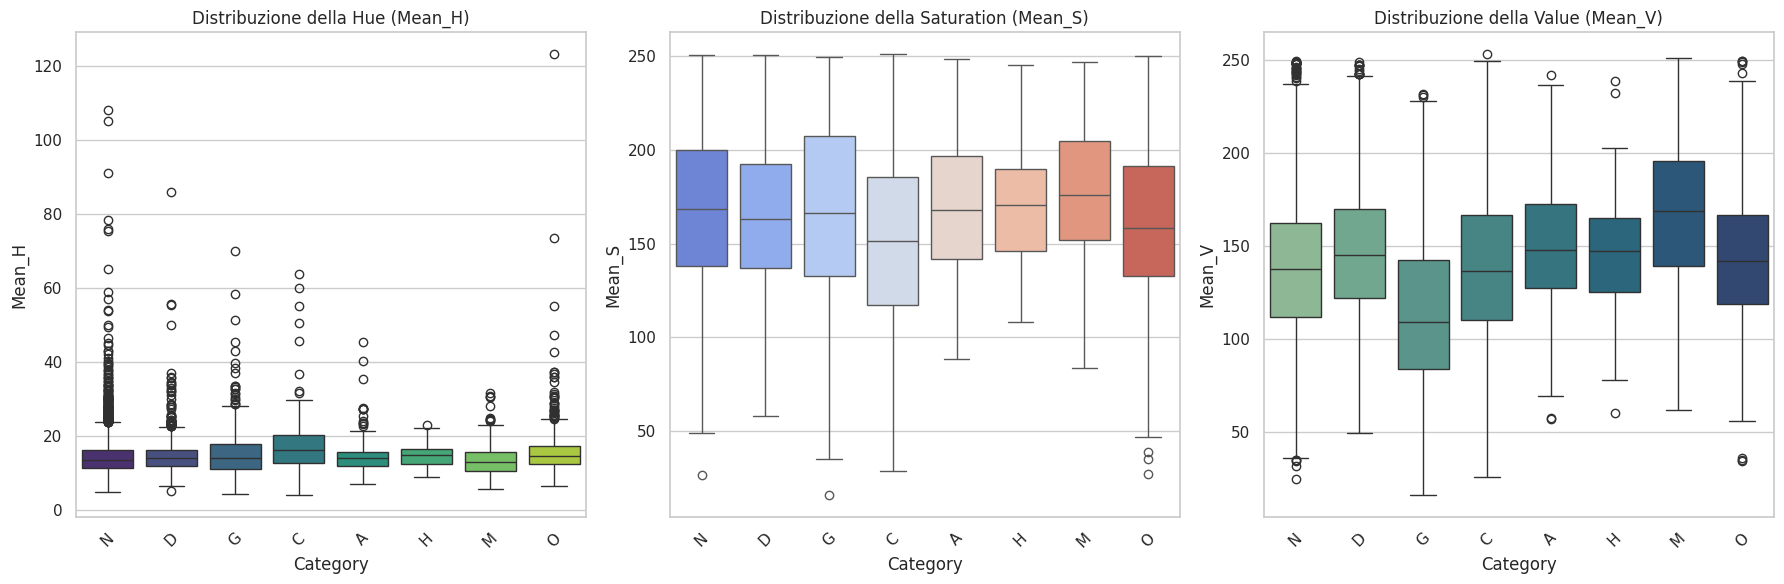

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carica il file CSV con le statistiche HSV
file_path = "hsv_patch_stats.csv"
df = pd.read_csv(file_path)

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Crea i boxplot per i canali H, S, V
plt.figure(figsize=(18, 6))

# Boxplot per Hue
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Category", y="Mean_H", palette="viridis")
plt.title("Distribuzione della Hue (Mean_H)")
plt.xticks(rotation=45)

# Boxplot per Saturation
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Category", y="Mean_S", palette="coolwarm")
plt.title("Distribuzione della Saturation (Mean_S)")
plt.xticks(rotation=45)

# Boxplot per Value
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Category", y="Mean_V", palette="crest")
plt.title("Distribuzione della Value (Mean_V)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
#Funzione Test di Shapiro-Wilk per normalità
def shapiro_test(channels, df, categories):
  for channel in channels:
      print(f"\nTest di normalità per {channel}:")
      for category in categories:
          data = df[df['Category'] == category][channel]
          stat, p_value = shapiro(data)
          print(f"Categoria {category}: stat={stat:.4f}, p-value={p_value:.4e}")
          if p_value > 0.05:
              print(f" -> La distribuzione per {category} è normale (p-value > 0.05).")

In [ ]:
from scipy.stats import shapiro

channels_HSV = ['Mean_H', 'Mean_S', 'Mean_V',
            'Median_H','Median_S','Median_V',
            'Std_H','Std_S','Std_V',
            'Skewness_H', 'Skewness_S','Skewness_V',
            'Kurtosis_H','Kurtosis_S','Kurtosis_V']
categories = df['Category'].unique()

shapiro_test(channels_HSV, df, categories)

#p-value = 0 suggerisce che la discrepanza tra i dati e la distribuzione normale è così significativa che non può essere attribuita al caso.


Test di normalità per Mean_H:
Categoria N: stat=0.6677, p-value=1.1804e-59
Categoria D: stat=0.7536, p-value=9.0839e-44
Categoria G: stat=0.7684, p-value=9.9557e-20
Categoria C: stat=0.8025, p-value=1.4116e-18
Categoria A: stat=0.8128, p-value=3.3170e-17
Categoria H: stat=0.9830, p-value=1.0987e-01
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9173, p-value=4.5352e-10
Categoria O: stat=0.5957, p-value=1.3866e-37

Test di normalità per Mean_S:
Categoria N: stat=0.9816, p-value=7.0905e-19
Categoria D: stat=0.9822, p-value=3.2818e-13
Categoria G: stat=0.9766, p-value=1.3479e-04
Categoria C: stat=0.9870, p-value=9.7260e-03
Categoria A: stat=0.9809, p-value=1.2280e-03
Categoria H: stat=0.9811, p-value=7.1330e-02
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9853, p-value=1.6710e-02
Categoria O: stat=0.9869, p-value=5.6057e-06

Test di normalità per Mean_V:
Categoria N: stat=0.9976, p-value=1.9211e-04
Categoria D: stat=0.9959, p-valu

I risultati del test di normalità indicano che quasi tutte le categorie non seguono una distribuzione normale, a eccezione di alcune categorie per alcuni canali (ad esempio, "Mean_H" per la categoria H, "Mean_S" per la categoria H, e "Mean_V" per alcune categorie). Il p-value < 0.05 suggerisce che la distribuzione si discosta dalla normalità.

---



Nonostante alcune categorie abbiano un p-value > 0.05, data l'elevata prevalenza di p-value < 0.05, è più prudente usare test non parametrici.


---


*   Test per due categorie: Usa il Mann-Whitney U test.
*   Test per più categorie: Usa il Kruskal-Wallis test.





Analisi per il canale: Mean_H


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


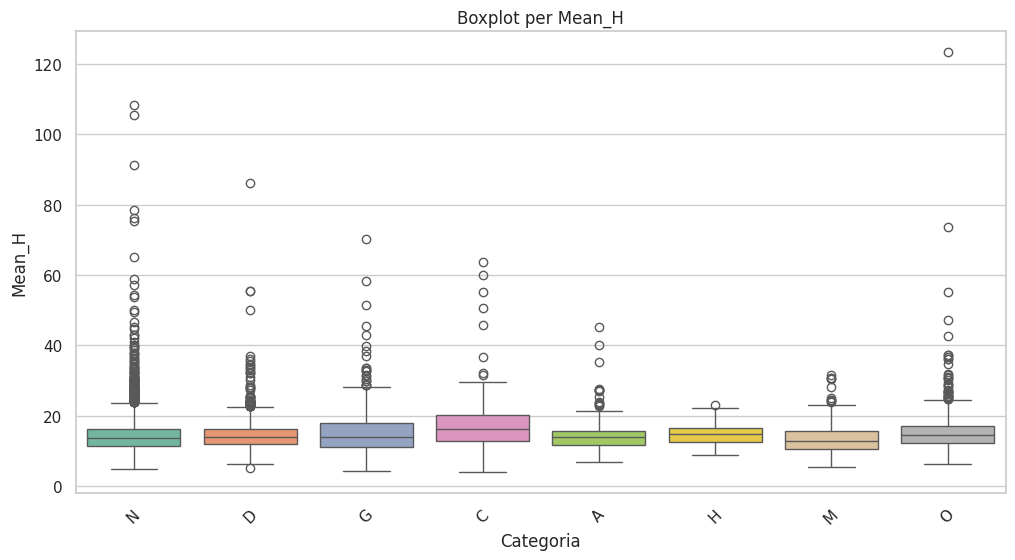

Confronto N vs D: stat=2217701.5000, p-value=2.6462e-02
 -> Differenza significativa tra N e D per Mean_H (p < 0.05)
Confronto N vs G: stat=386777.0000, p-value=1.4819e-01
 -> Nessuna differenza significativa tra N e G per Mean_H
Confronto N vs C: stat=299227.0000, p-value=3.2742e-16
 -> Differenza significativa tra N e C per Mean_H (p < 0.05)
Confronto N vs A: stat=374513.0000, p-value=5.9118e-01
 -> Nessuna differenza significativa tra N e A per Mean_H
Confronto N vs H: stat=160786.0000, p-value=1.6090e-02
 -> Differenza significativa tra N e H per Mean_H (p < 0.05)
Confronto N vs M: stat=372917.0000, p-value=2.5395e-03
 -> Differenza significativa tra N e M per Mean_H (p < 0.05)
Confronto N vs O: stat=892257.0000, p-value=4.1029e-07
 -> Differenza significativa tra N e O per Mean_H (p < 0.05)
Analisi per il canale: Mean_S


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


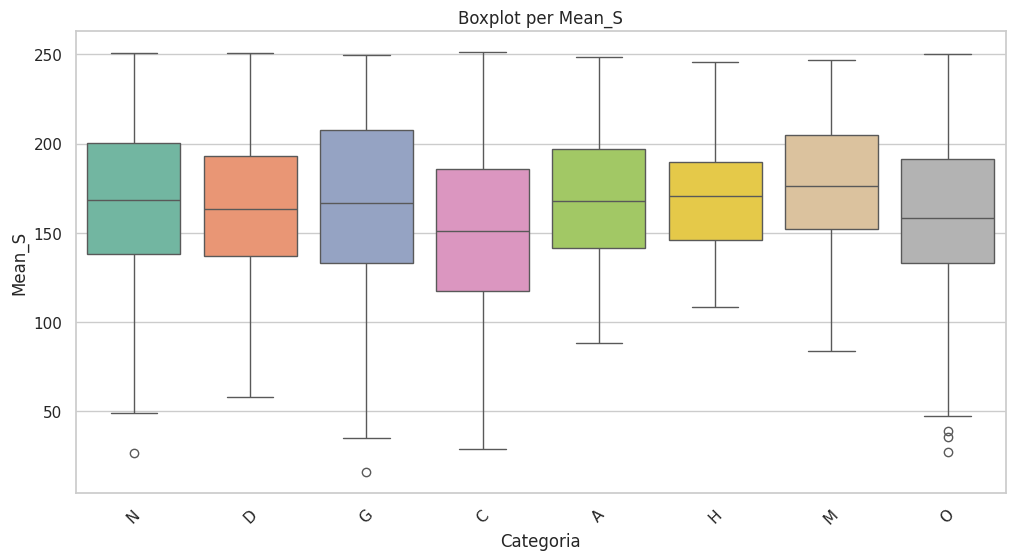

Confronto N vs D: stat=2419136.5000, p-value=8.5407e-03
 -> Differenza significativa tra N e D per Mean_S (p < 0.05)
Confronto N vs G: stat=412411.0000, p-value=7.6166e-01
 -> Nessuna differenza significativa tra N e G per Mean_S
Confronto N vs C: stat=506990.0000, p-value=7.6402e-09
 -> Differenza significativa tra N e C per Mean_S (p < 0.05)
Confronto N vs A: stat=384708.0000, p-value=8.5421e-01
 -> Nessuna differenza significativa tra N e A per Mean_S
Confronto N vs H: stat=183347.0000, p-value=9.5639e-01
 -> Nessuna differenza significativa tra N e H per Mean_S
Confronto N vs M: stat=292989.0000, p-value=2.1654e-03
 -> Differenza significativa tra N e M per Mean_S (p < 0.05)
Confronto N vs O: stat=1120934.0000, p-value=2.4843e-05
 -> Differenza significativa tra N e O per Mean_S (p < 0.05)
Analisi per il canale: Mean_V


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


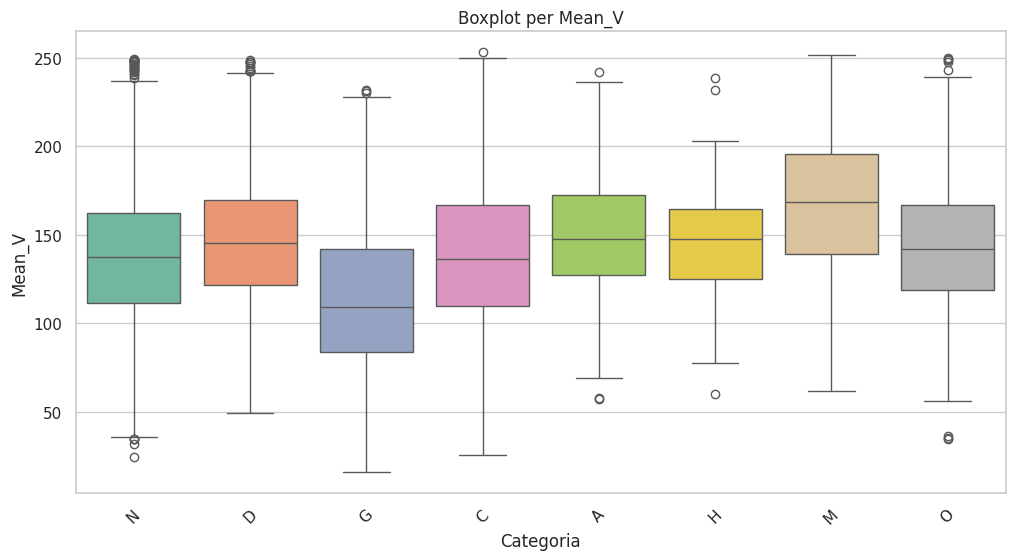

Confronto N vs D: stat=2002378.0000, p-value=1.3314e-13
 -> Differenza significativa tra N e D per Mean_V (p < 0.05)
Confronto N vs G: stat=548069.0000, p-value=1.1662e-21
 -> Differenza significativa tra N e G per Mean_V (p < 0.05)
Confronto N vs C: stat=417675.0000, p-value=8.2901e-01
 -> Nessuna differenza significativa tra N e C per Mean_V
Confronto N vs A: stat=310739.0000, p-value=4.4890e-07
 -> Differenza significativa tra N e A per Mean_V (p < 0.05)
Confronto N vs H: stat=156142.0000, p-value=3.8397e-03
 -> Differenza significativa tra N e H per Mean_V (p < 0.05)
Confronto N vs M: stat=187219.0000, p-value=1.0113e-28
 -> Differenza significativa tra N e M per Mean_V (p < 0.05)
Confronto N vs O: stat=920493.0000, p-value=8.9205e-05
 -> Differenza significativa tra N e O per Mean_V (p < 0.05)
Analisi per il canale: Median_H


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


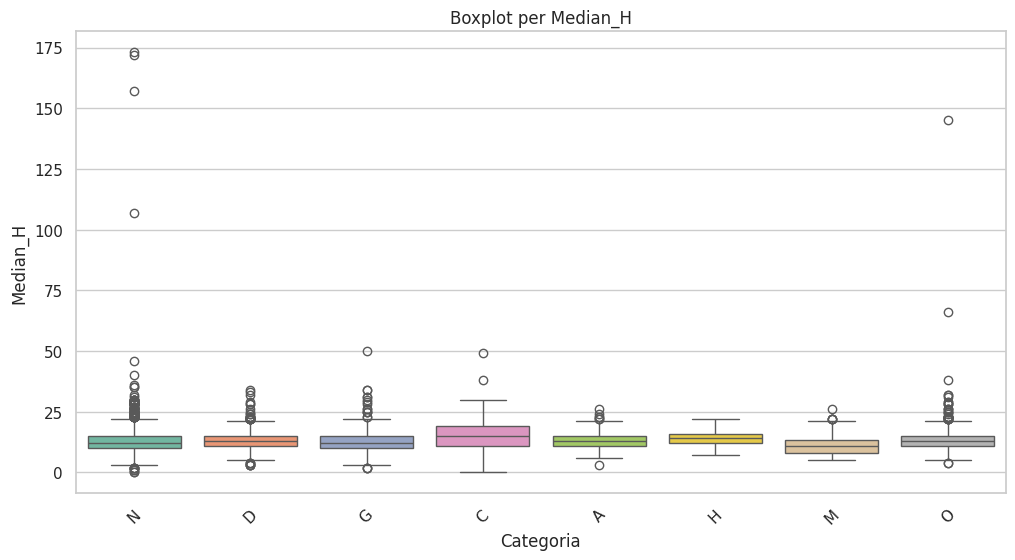

Confronto N vs D: stat=2095883.5000, p-value=2.2749e-07
 -> Differenza significativa tra N e D per Median_H (p < 0.05)
Confronto N vs G: stat=420703.0000, p-value=3.8278e-01
 -> Nessuna differenza significativa tra N e G per Median_H
Confronto N vs C: stat=290154.5000, p-value=1.3010e-18
 -> Differenza significativa tra N e C per Median_H (p < 0.05)
Confronto N vs A: stat=357305.0000, p-value=7.8130e-02
 -> Nessuna differenza significativa tra N e A per Median_H
Confronto N vs H: stat=141485.0000, p-value=9.0791e-06
 -> Differenza significativa tra N e H per Median_H (p < 0.05)
Confronto N vs M: stat=413135.5000, p-value=1.0215e-09
 -> Differenza significativa tra N e M per Median_H (p < 0.05)
Confronto N vs O: stat=891440.0000, p-value=3.0810e-07
 -> Differenza significativa tra N e O per Median_H (p < 0.05)
Analisi per il canale: Median_S


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


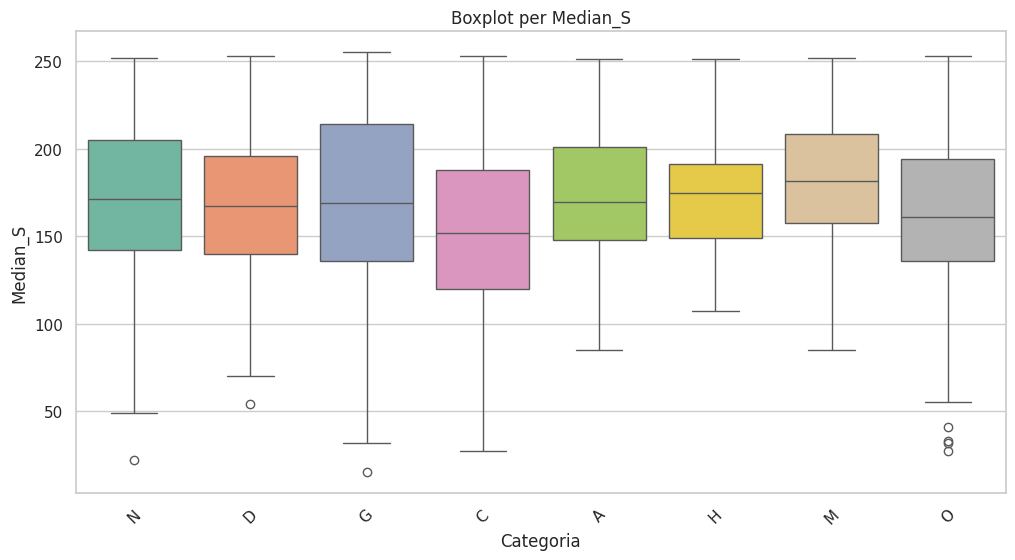

Confronto N vs D: stat=2438325.0000, p-value=1.9885e-03
 -> Differenza significativa tra N e D per Median_S (p < 0.05)
Confronto N vs G: stat=412961.5000, p-value=7.3319e-01
 -> Nessuna differenza significativa tra N e G per Median_S
Confronto N vs C: stat=512010.5000, p-value=9.7642e-10
 -> Differenza significativa tra N e C per Median_S (p < 0.05)
Confronto N vs A: stat=387298.5000, p-value=7.1365e-01
 -> Nessuna differenza significativa tra N e A per Median_S
Confronto N vs H: stat=185205.5000, p-value=8.8947e-01
 -> Nessuna differenza significativa tra N e H per Median_S
Confronto N vs M: stat=283548.0000, p-value=1.5343e-04
 -> Differenza significativa tra N e M per Median_S (p < 0.05)
Confronto N vs O: stat=1125990.5000, p-value=9.7991e-06
 -> Differenza significativa tra N e O per Median_S (p < 0.05)
Analisi per il canale: Median_V


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


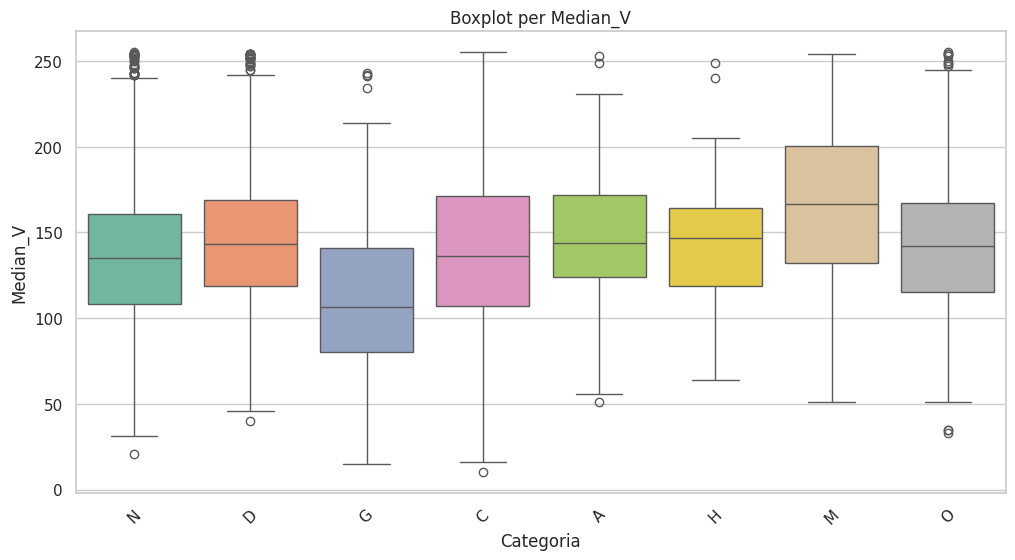

Confronto N vs D: stat=2001111.0000, p-value=1.0555e-13
 -> Differenza significativa tra N e D per Median_V (p < 0.05)
Confronto N vs G: stat=540596.5000, p-value=1.4122e-19
 -> Differenza significativa tra N e G per Median_V (p < 0.05)
Confronto N vs C: stat=401775.0000, p-value=1.9958e-01
 -> Nessuna differenza significativa tra N e C per Median_V
Confronto N vs A: stat=309765.0000, p-value=3.1206e-07
 -> Differenza significativa tra N e A per Median_V (p < 0.05)
Confronto N vs H: stat=158931.0000, p-value=9.3128e-03
 -> Differenza significativa tra N e H per Median_V (p < 0.05)
Confronto N vs M: stat=196259.5000, p-value=1.7845e-25
 -> Differenza significativa tra N e M per Median_V (p < 0.05)
Confronto N vs O: stat=918457.0000, p-value=6.3081e-05
 -> Differenza significativa tra N e O per Median_V (p < 0.05)
Analisi per il canale: Std_H


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


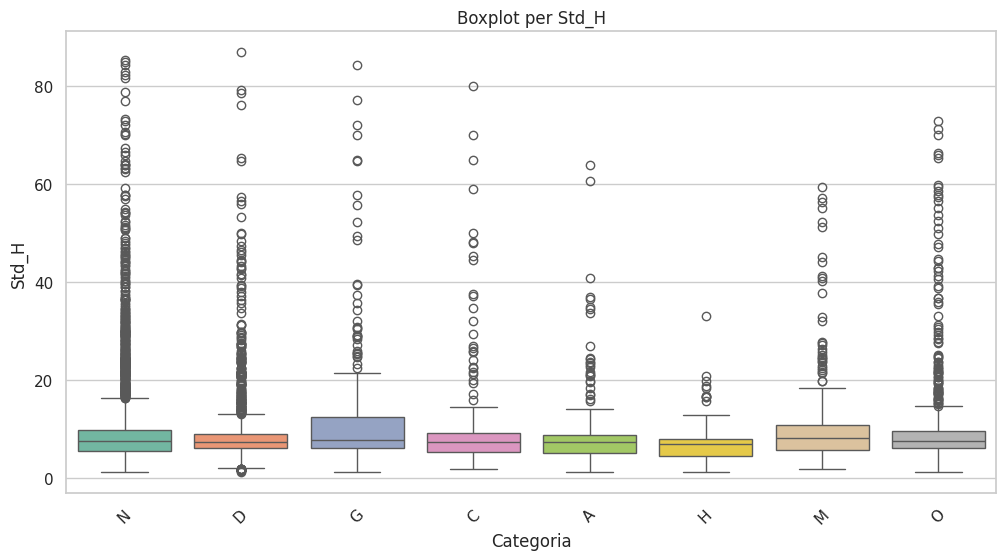

Confronto N vs D: stat=2351383.0000, p-value=3.1788e-01
 -> Nessuna differenza significativa tra N e D per Std_H
Confronto N vs G: stat=378150.0000, p-value=4.1881e-02
 -> Differenza significativa tra N e G per Std_H (p < 0.05)
Confronto N vs C: stat=439934.0000, p-value=2.0148e-01
 -> Nessuna differenza significativa tra N e C per Std_H
Confronto N vs A: stat=405819.0000, p-value=9.3613e-02
 -> Nessuna differenza significativa tra N e A per Std_H
Confronto N vs H: stat=211725.0000, p-value=3.6859e-03
 -> Differenza significativa tra N e H per Std_H (p < 0.05)
Confronto N vs M: stat=298768.0000, p-value=8.6247e-03
 -> Differenza significativa tra N e M per Std_H (p < 0.05)
Confronto N vs O: stat=997328.0000, p-value=4.2369e-01
 -> Nessuna differenza significativa tra N e O per Std_H
Analisi per il canale: Std_S


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


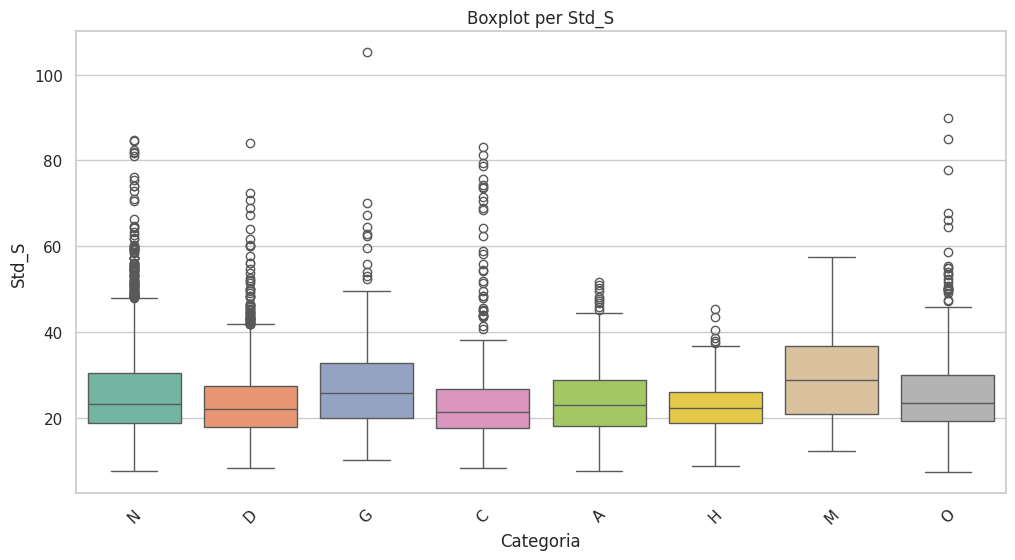

Confronto N vs D: stat=2552434.0000, p-value=5.2551e-09
 -> Differenza significativa tra N e D per Std_S (p < 0.05)
Confronto N vs G: stat=361497.0000, p-value=1.5184e-03
 -> Differenza significativa tra N e G per Std_S (p < 0.05)
Confronto N vs C: stat=467930.0000, p-value=1.6015e-03
 -> Differenza significativa tra N e C per Std_S (p < 0.05)
Confronto N vs A: stat=403372.0000, p-value=1.3269e-01
 -> Nessuna differenza significativa tra N e A per Std_S
Confronto N vs H: stat=204879.0000, p-value=2.8516e-02
 -> Differenza significativa tra N e H per Std_S (p < 0.05)
Confronto N vs M: stat=250580.0000, p-value=3.0676e-10
 -> Differenza significativa tra N e M per Std_S (p < 0.05)
Confronto N vs O: stat=1007057.0000, p-value=6.8533e-01
 -> Nessuna differenza significativa tra N e O per Std_S
Analisi per il canale: Std_V


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


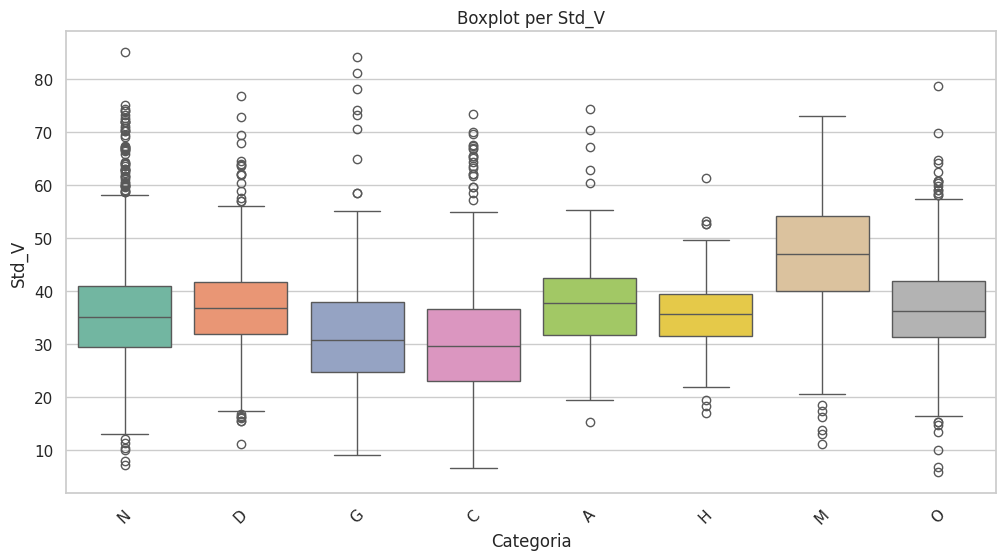

Confronto N vs D: stat=2078352.0000, p-value=2.4892e-08
 -> Differenza significativa tra N e D per Std_V (p < 0.05)
Confronto N vs G: stat=493089.0000, p-value=6.2844e-09
 -> Differenza significativa tra N e G per Std_V (p < 0.05)
Confronto N vs C: stat=538729.0000, p-value=2.6662e-15
 -> Differenza significativa tra N e C per Std_V (p < 0.05)
Confronto N vs A: stat=327556.0000, p-value=1.1444e-04
 -> Differenza significativa tra N e A per Std_V (p < 0.05)
Confronto N vs H: stat=178955.0000, p-value=6.0824e-01
 -> Nessuna differenza significativa tra N e H per Std_V
Confronto N vs M: stat=138699.0000, p-value=1.2026e-49
 -> Differenza significativa tra N e M per Std_V (p < 0.05)
Confronto N vs O: stat=931307.0000, p-value=5.0262e-04
 -> Differenza significativa tra N e O per Std_V (p < 0.05)
Analisi per il canale: Skewness_H


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


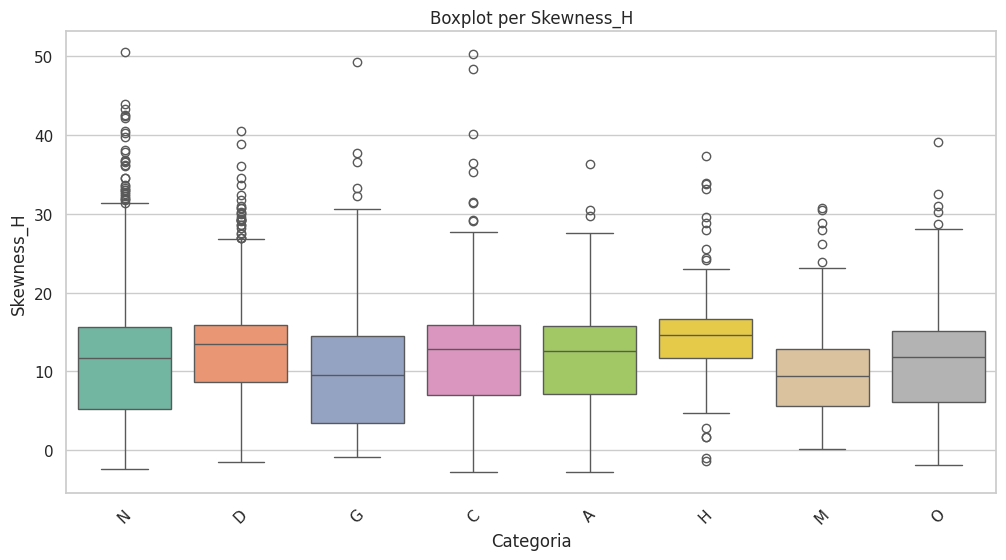

Confronto N vs D: stat=2010178.0000, p-value=5.3843e-13
 -> Differenza significativa tra N e D per Skewness_H (p < 0.05)
Confronto N vs G: stat=461884.0000, p-value=2.3370e-04
 -> Differenza significativa tra N e G per Skewness_H (p < 0.05)
Confronto N vs C: stat=390285.0000, p-value=4.0015e-02
 -> Differenza significativa tra N e C per Skewness_H (p < 0.05)
Confronto N vs A: stat=357054.0000, p-value=7.6436e-02
 -> Nessuna differenza significativa tra N e A per Skewness_H
Confronto N vs H: stat=134120.0000, p-value=2.1368e-07
 -> Differenza significativa tra N e H per Skewness_H (p < 0.05)
Confronto N vs M: stat=384249.0000, p-value=1.0388e-04
 -> Differenza significativa tra N e M per Skewness_H (p < 0.05)
Confronto N vs O: stat=1017657.0000, p-value=9.8010e-01
 -> Nessuna differenza significativa tra N e O per Skewness_H
Analisi per il canale: Skewness_S


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


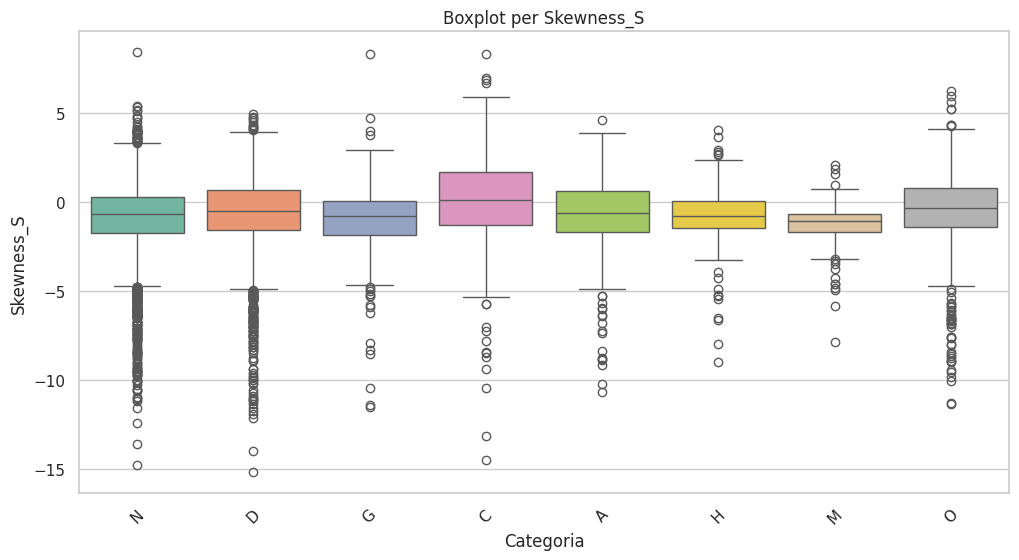

Confronto N vs D: stat=2140056.0000, p-value=4.3402e-05
 -> Differenza significativa tra N e D per Skewness_S (p < 0.05)
Confronto N vs G: stat=426521.0000, p-value=2.0544e-01
 -> Nessuna differenza significativa tra N e G per Skewness_S
Confronto N vs C: stat=319090.0000, p-value=8.4830e-12
 -> Differenza significativa tra N e C per Skewness_S (p < 0.05)
Confronto N vs A: stat=366245.0000, p-value=2.6195e-01
 -> Nessuna differenza significativa tra N e A per Skewness_S
Confronto N vs H: stat=183974.0000, p-value=9.9156e-01
 -> Nessuna differenza significativa tra N e H per Skewness_S
Confronto N vs M: stat=397434.0000, p-value=1.0334e-06
 -> Differenza significativa tra N e M per Skewness_S (p < 0.05)
Confronto N vs O: stat=897113.0000, p-value=1.1328e-06
 -> Differenza significativa tra N e O per Skewness_S (p < 0.05)
Analisi per il canale: Skewness_V


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


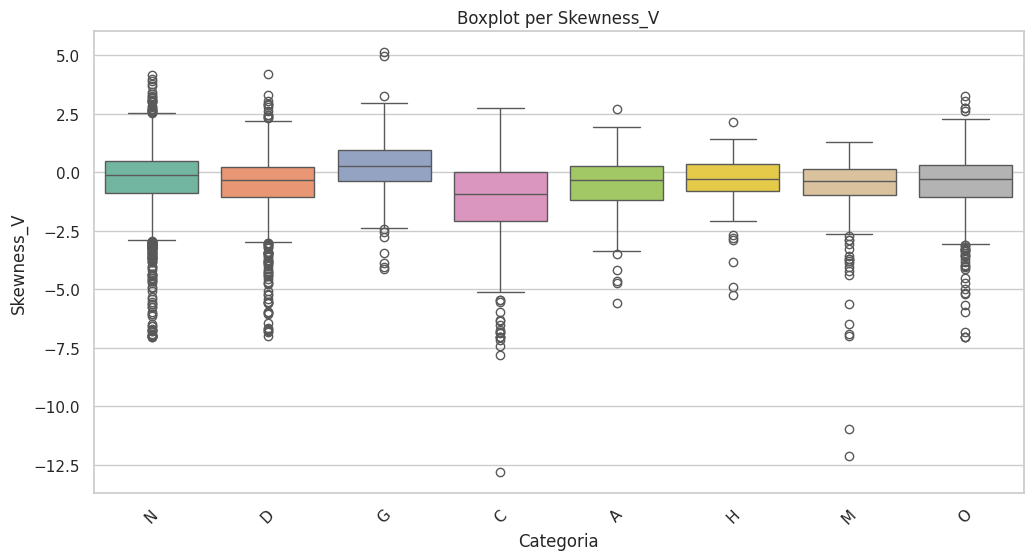

Confronto N vs D: stat=2585118.0000, p-value=3.4558e-11
 -> Differenza significativa tra N e D per Skewness_V (p < 0.05)
Confronto N vs G: stat=312775.0000, p-value=8.2441e-11
 -> Differenza significativa tra N e G per Skewness_V (p < 0.05)
Confronto N vs C: stat=570752.0000, p-value=8.8148e-24
 -> Differenza significativa tra N e C per Skewness_V (p < 0.05)
Confronto N vs A: stat=436340.0000, p-value=1.2559e-04
 -> Differenza significativa tra N e A per Skewness_V (p < 0.05)
Confronto N vs H: stat=194091.0000, p-value=2.8671e-01
 -> Nessuna differenza significativa tra N e H per Skewness_V
Confronto N vs M: stat=389183.0000, p-value=2.0720e-05
 -> Differenza significativa tra N e M per Skewness_V (p < 0.05)
Confronto N vs O: stat=1125636.0000, p-value=1.0479e-05
 -> Differenza significativa tra N e O per Skewness_V (p < 0.05)
Analisi per il canale: Kurtosis_H


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


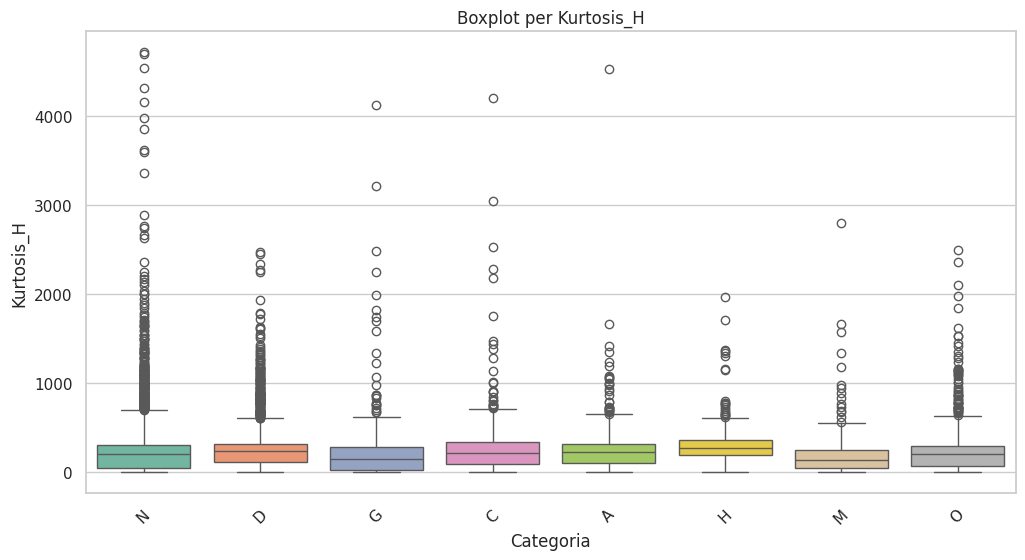

Confronto N vs D: stat=2044873.0000, p-value=1.7710e-10
 -> Differenza significativa tra N e D per Kurtosis_H (p < 0.05)
Confronto N vs G: stat=460709.0000, p-value=3.1907e-04
 -> Differenza significativa tra N e G per Kurtosis_H (p < 0.05)
Confronto N vs C: stat=386146.0000, p-value=1.9739e-02
 -> Differenza significativa tra N e C per Kurtosis_H (p < 0.05)
Confronto N vs A: stat=351163.0000, p-value=2.8645e-02
 -> Differenza significativa tra N e A per Kurtosis_H (p < 0.05)
Confronto N vs H: stat=135801.0000, p-value=5.3932e-07
 -> Differenza significativa tra N e H per Kurtosis_H (p < 0.05)
Confronto N vs M: stat=379364.0000, p-value=4.4907e-04
 -> Differenza significativa tra N e M per Kurtosis_H (p < 0.05)
Confronto N vs O: stat=1004420.0000, p-value=6.0850e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_H
Analisi per il canale: Kurtosis_S


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


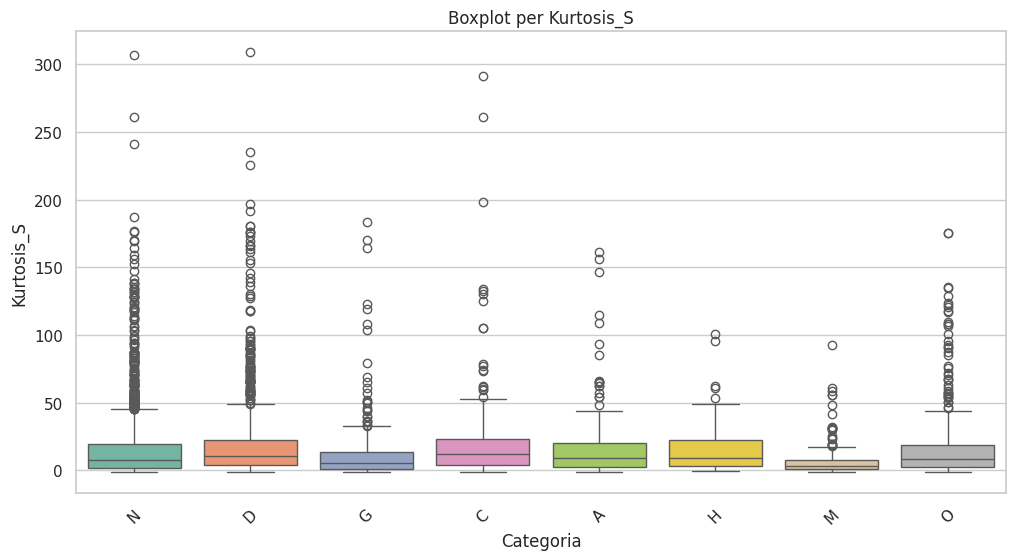

Confronto N vs D: stat=2003046.0000, p-value=1.5026e-13
 -> Differenza significativa tra N e D per Kurtosis_S (p < 0.05)
Confronto N vs G: stat=452683.0000, p-value=2.2764e-03
 -> Differenza significativa tra N e G per Kurtosis_S (p < 0.05)
Confronto N vs C: stat=353679.0000, p-value=6.4972e-06
 -> Differenza significativa tra N e C per Kurtosis_S (p < 0.05)
Confronto N vs A: stat=357469.0000, p-value=8.1438e-02
 -> Nessuna differenza significativa tra N e A per Kurtosis_S
Confronto N vs H: stat=168235.0000, p-value=1.0305e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_S
Confronto N vs M: stat=424640.0000, p-value=3.4891e-12
 -> Differenza significativa tra N e M per Kurtosis_S (p < 0.05)
Confronto N vs O: stat=1000762.0000, p-value=5.0882e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_S
Analisi per il canale: Kurtosis_V


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


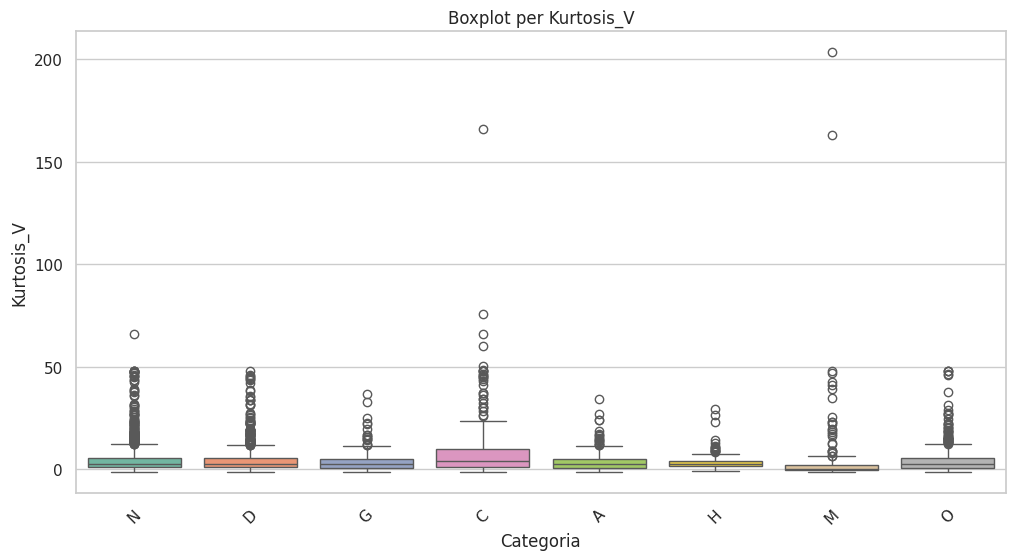

Confronto N vs D: stat=2266776.0000, p-value=2.9929e-01
 -> Nessuna differenza significativa tra N e D per Kurtosis_V
Confronto N vs G: stat=418952.0000, p-value=4.5345e-01
 -> Nessuna differenza significativa tra N e G per Kurtosis_V
Confronto N vs C: stat=342168.0000, p-value=1.2791e-07
 -> Differenza significativa tra N e C per Kurtosis_V (p < 0.05)
Confronto N vs A: stat=401138.0000, p-value=1.7843e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_V
Confronto N vs H: stat=175526.0000, p-value=3.8425e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_V
Confronto N vs M: stat=475369.0000, p-value=2.8084e-27
 -> Differenza significativa tra N e M per Kurtosis_V (p < 0.05)
Confronto N vs O: stat=1036275.0000, p-value=4.3509e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_V


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from google.colab import files

# Funzione per creare boxplot e calcolare test statistici
def analyze_channel(df, channel, categories,results):
    print(f"Analisi per il canale: {channel}")

    # Creazione del boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')
    plt.title(f'Boxplot per {channel}')
    plt.xlabel('Categoria')
    plt.ylabel(channel)
    plt.xticks(rotation=45)
    plt.show()

    significant_category=[]
    # Confronto tra Normale (N) e ciascuna patologia
    normal_values = df[df['Category'] == 'N'][channel].dropna()
    for category in categories:
        if category == 'N':
            continue
        category_values = df[df['Category'] == category][channel].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(normal_values, category_values, alternative='two-sided')
        print(f"Confronto N vs {category}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra N e {category} per {channel} (p < 0.05)")
            significant = 'Yes'
            significant_category.append(category)
        else:
            print(f" -> Nessuna differenza significativa tra N e {category} per {channel}")
            significant = 'No'
        results.append({
            'Channel': channel,
            'Comparison': f'N vs {category}',
            'P-value': p_value,
            'Significant': significant
        })


results_HSV = []
# Analisi per ciascun canale HSV
for channel_HSV in channels_HSV:
    analyze_channel(df, channel_HSV, categories,results_HSV)

# Crea un DataFrame dai risultati
mwu_HSV_df = pd.DataFrame(results_HSV)

# Salva i risultati su un file CSV
mwu_HSV_df.to_csv("mwu_HSV_df.csv", index=False)

In [ ]:
files.download('mwu_HSV_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*  Hue (H): Differenze nei colori dominanti
Interpreta i valori di Hue:
Ad esempio, valori di Hue bassi indicano tonalità rosse, mentre valori alti indicano verde/blu.
*  Saturation (S): Differenze nell'intensità cromatica
  1.  Confronta le intensità di saturazione.
  2. Le immagini patologiche potrebbero avere una saturazione ridotta a causa di opacità o variazioni nei tessuti.
*  Value (V): Differenze nella luminosità
  1. Confronta la luminosità media.
  2. Le immagini con patologie potrebbero mostrare valori medi più bassi di luminosità (ad esempio, lesioni più scure).







---
# ANALISI RGB


In [ ]:
immaginipath=path+"/preprocessed_images"
data=pd.read_csv(path+'/full_df.csv')
results =[]
categories = {
    "N": N, "D": D, "G": G, "C": C,
    "A": A, "H": H, "M": M, "O": O
}

for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
    # Dimensioni dell'immagine
    h, w, _ = img_rgb.shape

    # Crea la maschera circolare
    center = (w // 2, h // 2)  # Centro dell'immagine
    radius = 256  # Raggio del cerchio
    circular_mask = create_circular_mask(h, w, center=center, radius=radius)

    # Applica la maschera al canale H
    img_circular = img_rgb[circular_mask]

    # Calcola le statistiche sui pixel della patch circolare
    mean_h_circular = np.mean(img_circular)
    median_h_circular = np.median(img_circular)
    std_h_circular = np.std(img_circular)

    # Crea una versione dell'immagine con la maschera applicata
    masked_image = np.copy(img_rgb)
    masked_image[~circular_mask] = 0  # Imposta i pixel esterni al cerchio a 0
   # Applica la maschera ai canali HSV
    R, G, B = cv2.split(img_rgb)
    R_circular = R[circular_mask]
    G_circular = G[circular_mask]
    B_circular = B[circular_mask]

  # Calcola le statistiche per la patch
    stats = {
        'Category': category,
        'Image': file,
        'Mean_R': np.mean(R_circular),
        'Median_R': np.median(R_circular),
        'Std_R': np.std(R_circular),
        'Skewness_R': skew(R_circular),
        'Kurtosis_R': kurtosis(R_circular),
        'Mean_G': np.mean(G_circular),
        'Median_G': np.median(G_circular),
        'Std_G': np.std(G_circular),
        'Skewness_G': skew(G_circular),
        'Kurtosis_G': kurtosis(G_circular),
        'Mean_B': np.mean(B_circular),
        'Median_B': np.median(B_circular),
        'Std_B': np.std(B_circular),
        'Skewness_B': skew(B_circular),
        'Kurtosis_B': kurtosis(B_circular)
    }
    results.append(stats)

# Crea un DataFrame dai risultati
df_stats_RGB = pd.DataFrame(results)

# Salva i risultati su un file CSV
df_stats_RGB.to_csv("RGB_patch_stats.csv", index=False)

# Visualizza i primi risultati
print(df_stats_RGB.head())


  Category         Image      Mean_R  Median_R      Std_R  Skewness_R  \
0        N   0_right.jpg   79.862425      78.0  25.890529    0.732461   
1        N   1_right.jpg  165.723986     160.0  36.520842    0.047568   
2        N   8_right.jpg  163.066147     151.0  48.597259    0.430972   
3        N  10_right.jpg  179.221885     180.0  20.091592   -0.493307   
4        N  29_right.jpg   96.743072     101.0  28.628170   -0.583045   

   Kurtosis_R      Mean_G  Median_G      Std_G  Skewness_G  Kurtosis_G  \
0    0.885035   53.431164      51.0   9.092319    0.211648    6.020713   
1    0.925550  116.269267     109.0  29.636578    0.560028    1.792489   
2   -0.831371   71.393789      63.0  26.612990    0.966289    1.140276   
3    4.546928  104.488106     101.0  16.871050    0.676973    3.021195   
4    0.764294   73.332529      72.0  28.737508    0.681974    1.281046   

      Mean_B  Median_B      Std_B  Skewness_B  Kurtosis_B  
0  29.151191      28.0   5.719399    0.903760    7.32753

<ipython-input-10-0b662f63d35e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RGB_df, x="Category", y="Mean_R", palette="viridis")
<ipython-input-10-0b662f63d35e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RGB_df, x="Category", y="Mean_G", palette="coolwarm")
<ipython-input-10-0b662f63d35e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=RGB_df, x="Category", y="Mean_B", palette="crest")


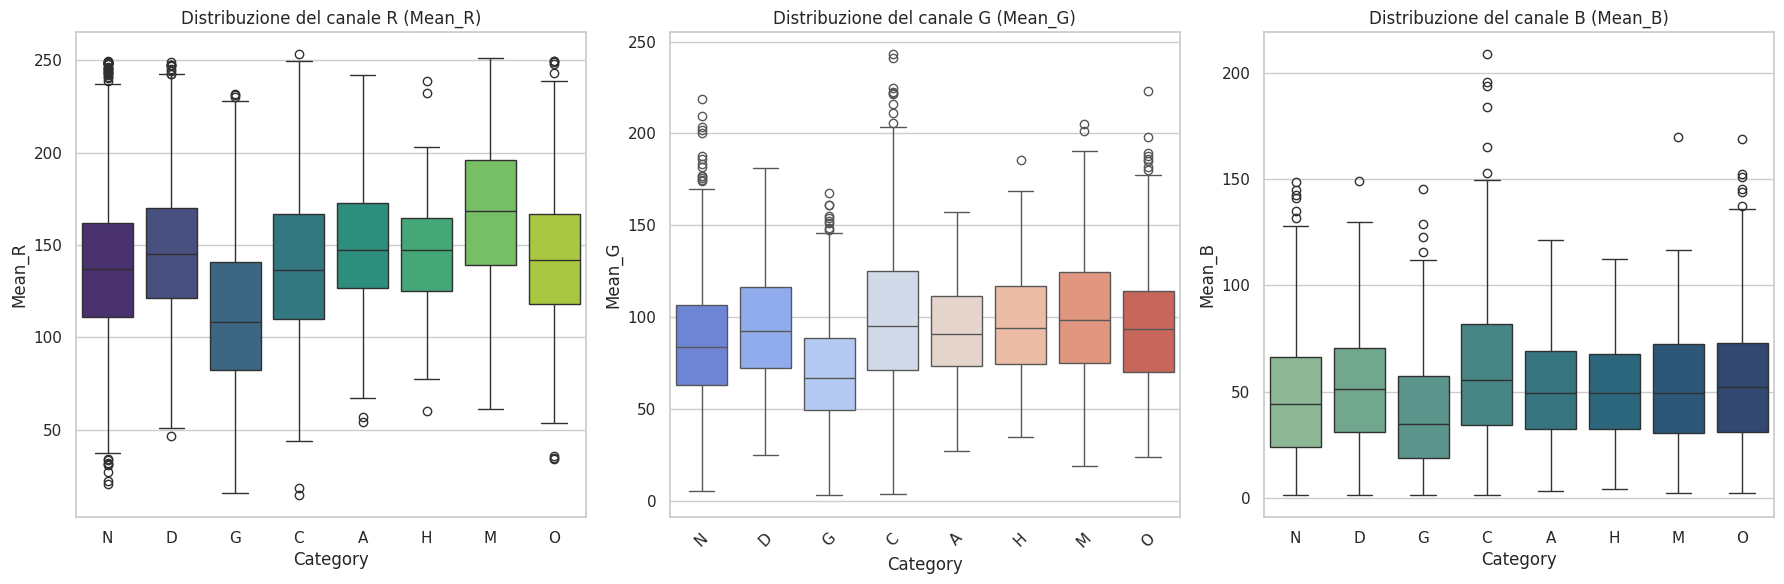

In [ ]:
# Carica il file CSV con le statistiche HSV
file_path = "RGB_patch_stats.csv"
RGB_df = pd.read_csv(file_path)

# Configura lo stile di Seaborn
sns.set(style="whitegrid")

# Crea i boxplot per i canali H, S, V
plt.figure(figsize=(18, 6))

# Boxplot per canale R
plt.subplot(1, 3, 1)
sns.boxplot(data=RGB_df, x="Category", y="Mean_R", palette="viridis")
plt.title("Distribuzione del canale R (Mean_R)")

# Boxplot per G
plt.subplot(1, 3, 2)
sns.boxplot(data=RGB_df, x="Category", y="Mean_G", palette="coolwarm")
plt.title("Distribuzione del canale G (Mean_G)")
plt.xticks(rotation=45)

# Boxplot per B
plt.subplot(1, 3, 3)
sns.boxplot(data=RGB_df, x="Category", y="Mean_B", palette="crest")
plt.title("Distribuzione del canale B (Mean_B)")

plt.tight_layout()
plt.show()

In [ ]:
# Test di Shapiro-Wilk per normalità
channels_RGB = ['Mean_R', 'Mean_G', 'Mean_B',
            'Median_R','Median_G','Median_B',
            'Std_R','Std_G','Std_B',
            'Skewness_R', 'Skewness_G','Skewness_B',
            'Kurtosis_R','Kurtosis_G','Kurtosis_B']

shapiro_test(channels_RGB, RGB_df, categories)

#p-value = 0 suggerisce che la discrepanza tra i dati e la distribuzione normale è così significativa che non può essere attribuita al caso.


Test di normalità per Mean_R:
Categoria N: stat=0.9978, p-value=4.5058e-04
Categoria D: stat=0.9961, p-value=3.8587e-04
Categoria G: stat=0.9836, p-value=2.4750e-03
Categoria C: stat=0.9880, p-value=1.5927e-02
Categoria A: stat=0.9926, p-value=2.0625e-01
 -> La distribuzione per A è normale (p-value > 0.05).
Categoria H: stat=0.9937, p-value=8.4113e-01
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9936, p-value=4.1981e-01
 -> La distribuzione per M è normale (p-value > 0.05).
Categoria O: stat=0.9958, p-value=5.4746e-02
 -> La distribuzione per O è normale (p-value > 0.05).

Test di normalità per Mean_G:
Categoria N: stat=0.9883, p-value=1.2835e-14
Categoria D: stat=0.9913, p-value=3.3178e-08
Categoria G: stat=0.9677, p-value=5.4328e-06
Categoria C: stat=0.9643, p-value=1.2324e-06
Categoria A: stat=0.9799, p-value=8.3415e-04
Categoria H: stat=0.9830, p-value=1.0985e-01
 -> La distribuzione per H è normale (p-value > 0.05).
Categoria M: stat=0.9886, p-value

Analisi per il canale: Mean_R


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


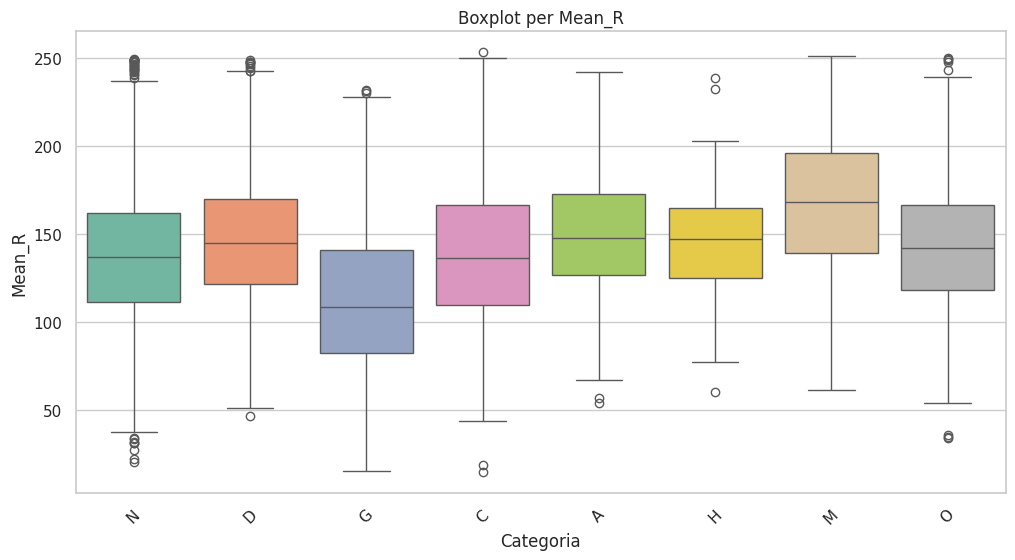

Confronto N vs D: stat=1995948.0000, p-value=4.0995e-14
 -> Differenza significativa tra N e D per Mean_R (p < 0.05)
Confronto N vs G: stat=549377.0000, p-value=4.9029e-22
 -> Differenza significativa tra N e G per Mean_R (p < 0.05)
Confronto N vs C: stat=416617.0000, p-value=7.7415e-01
 -> Nessuna differenza significativa tra N e C per Mean_R
Confronto N vs A: stat=310055.0000, p-value=3.4814e-07
 -> Differenza significativa tra N e A per Mean_R (p < 0.05)
Confronto N vs H: stat=155503.0000, p-value=3.0998e-03
 -> Differenza significativa tra N e H per Mean_R (p < 0.05)
Confronto N vs M: stat=186938.0000, p-value=7.9549e-29
 -> Differenza significativa tra N e M per Mean_R (p < 0.05)
Confronto N vs O: stat=919671.5000, p-value=7.7643e-05
 -> Differenza significativa tra N e O per Mean_R (p < 0.05)
Analisi per il canale: Mean_G


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


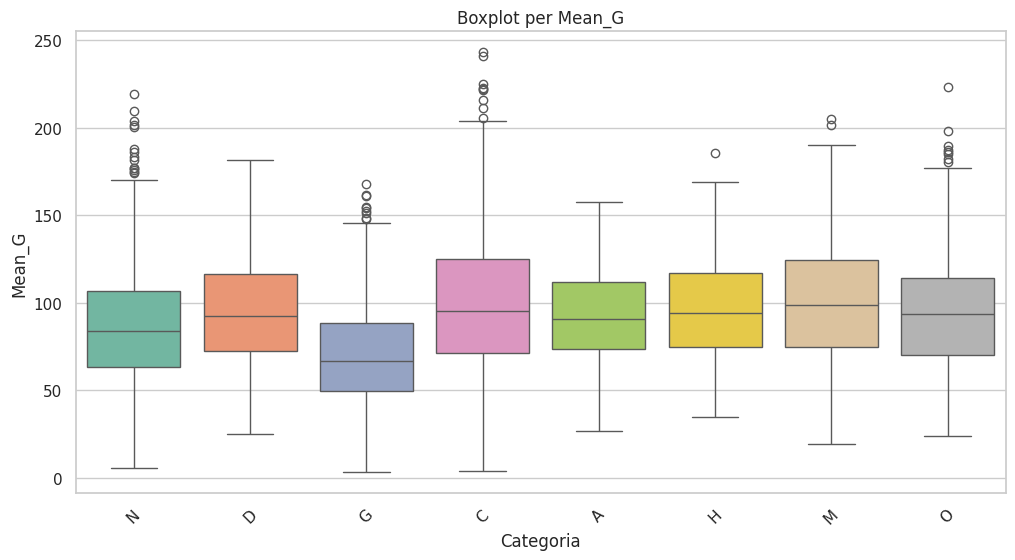

Confronto N vs D: stat=1937728.0000, p-value=3.2653e-19
 -> Differenza significativa tra N e D per Mean_G (p < 0.05)
Confronto N vs G: stat=521869.0000, p-value=7.6625e-15
 -> Differenza significativa tra N e G per Mean_G (p < 0.05)
Confronto N vs C: stat=342145.0000, p-value=1.2684e-07
 -> Differenza significativa tra N e C per Mean_G (p < 0.05)
Confronto N vs A: stat=328185.0000, p-value=1.3715e-04
 -> Differenza significativa tra N e A per Mean_G (p < 0.05)
Confronto N vs H: stat=146504.0000, p-value=9.7839e-05
 -> Differenza significativa tra N e H per Mean_G (p < 0.05)
Confronto N vs M: stat=253654.0000, p-value=1.3504e-09
 -> Differenza significativa tra N e M per Mean_G (p < 0.05)
Confronto N vs O: stat=852391.0000, p-value=2.3570e-11
 -> Differenza significativa tra N e O per Mean_G (p < 0.05)
Analisi per il canale: Mean_B


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


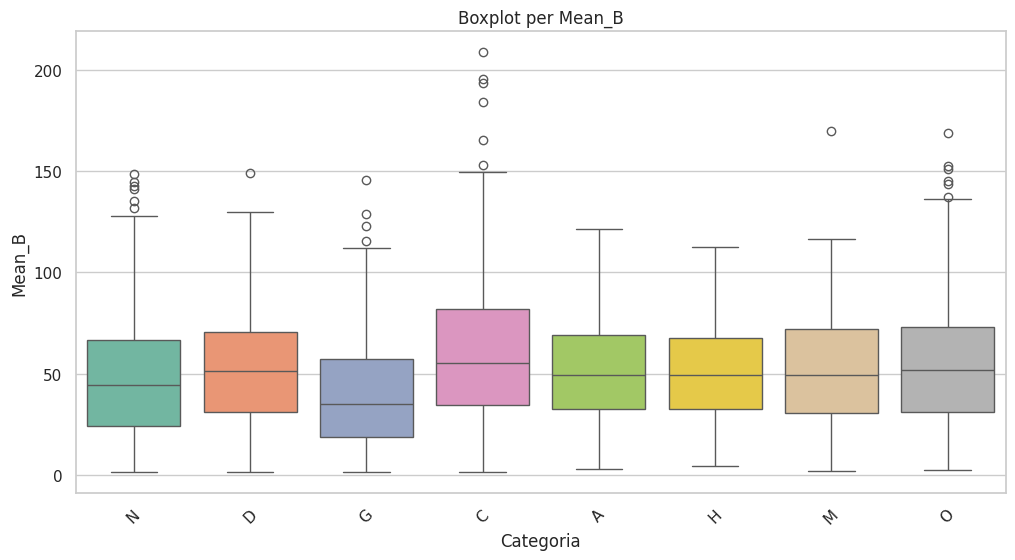

Confronto N vs D: stat=2077072.0000, p-value=2.0845e-08
 -> Differenza significativa tra N e D per Mean_B (p < 0.05)
Confronto N vs G: stat=470078.0000, p-value=2.2485e-05
 -> Differenza significativa tra N e G per Mean_B (p < 0.05)
Confronto N vs C: stat=343226.0000, p-value=1.8800e-07
 -> Differenza significativa tra N e C per Mean_B (p < 0.05)
Confronto N vs A: stat=350974.0000, p-value=2.7686e-02
 -> Differenza significativa tra N e A per Mean_B (p < 0.05)
Confronto N vs H: stat=165138.0000, p-value=5.0804e-02
 -> Nessuna differenza significativa tra N e H per Mean_B
Confronto N vs M: stat=293152.0000, p-value=2.2570e-03
 -> Differenza significativa tra N e M per Mean_B (p < 0.05)
Confronto N vs O: stat=890772.0000, p-value=2.9851e-07
 -> Differenza significativa tra N e O per Mean_B (p < 0.05)
Analisi per il canale: Median_R


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


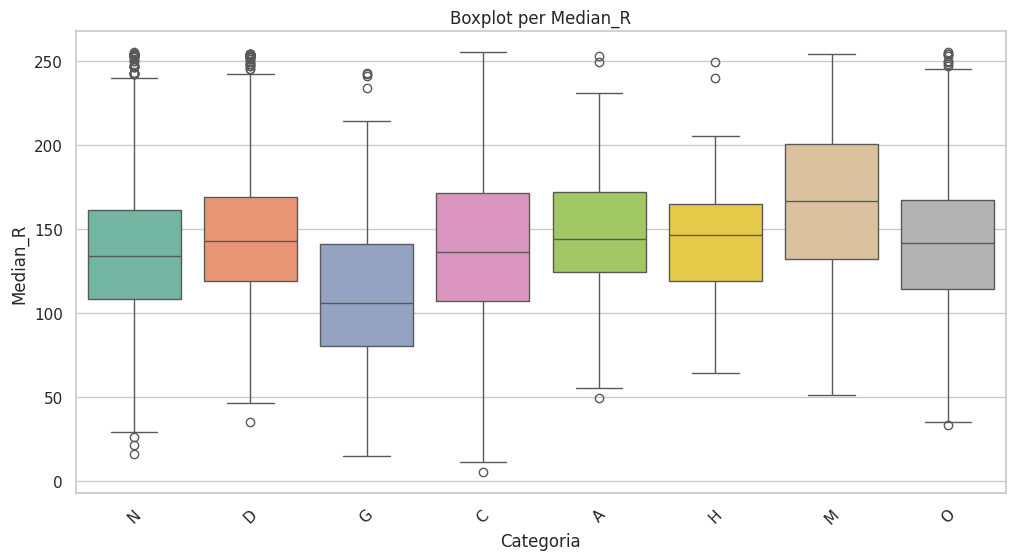

Confronto N vs D: stat=1995718.0000, p-value=3.9209e-14
 -> Differenza significativa tra N e D per Median_R (p < 0.05)
Confronto N vs G: stat=540933.0000, p-value=1.1441e-19
 -> Differenza significativa tra N e G per Median_R (p < 0.05)
Confronto N vs C: stat=401010.5000, p-value=1.8219e-01
 -> Nessuna differenza significativa tra N e C per Median_R
Confronto N vs A: stat=308938.0000, p-value=2.2853e-07
 -> Differenza significativa tra N e A per Median_R (p < 0.05)
Confronto N vs H: stat=158288.5000, p-value=7.6454e-03
 -> Differenza significativa tra N e H per Median_R (p < 0.05)
Confronto N vs M: stat=196409.0000, p-value=2.0116e-25
 -> Differenza significativa tra N e M per Median_R (p < 0.05)
Confronto N vs O: stat=918070.0000, p-value=5.9023e-05
 -> Differenza significativa tra N e O per Median_R (p < 0.05)
Analisi per il canale: Median_G


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


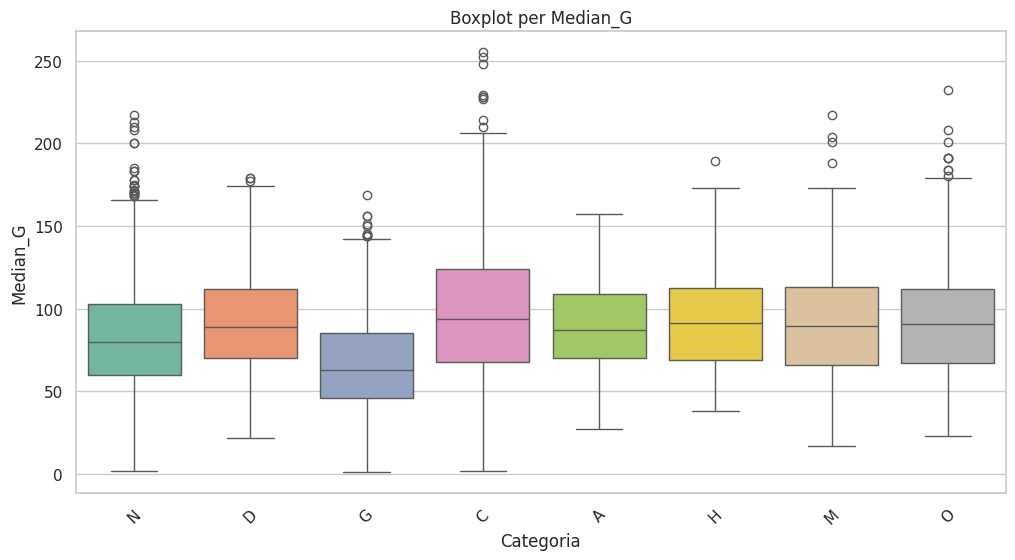

Confronto N vs D: stat=1934549.0000, p-value=1.6200e-19
 -> Differenza significativa tra N e D per Median_G (p < 0.05)
Confronto N vs G: stat=517908.5000, p-value=6.2310e-14
 -> Differenza significativa tra N e G per Median_G (p < 0.05)
Confronto N vs C: stat=335562.0000, p-value=1.0326e-08
 -> Differenza significativa tra N e C per Median_G (p < 0.05)
Confronto N vs A: stat=325663.5000, p-value=6.5584e-05
 -> Differenza significativa tra N e A per Median_G (p < 0.05)
Confronto N vs H: stat=149083.5000, p-value=2.8658e-04
 -> Differenza significativa tra N e H per Median_G (p < 0.05)
Confronto N vs M: stat=286643.5000, p-value=3.8546e-04
 -> Differenza significativa tra N e M per Median_G (p < 0.05)
Confronto N vs O: stat=852899.0000, p-value=2.7066e-11
 -> Differenza significativa tra N e O per Median_G (p < 0.05)
Analisi per il canale: Median_B


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


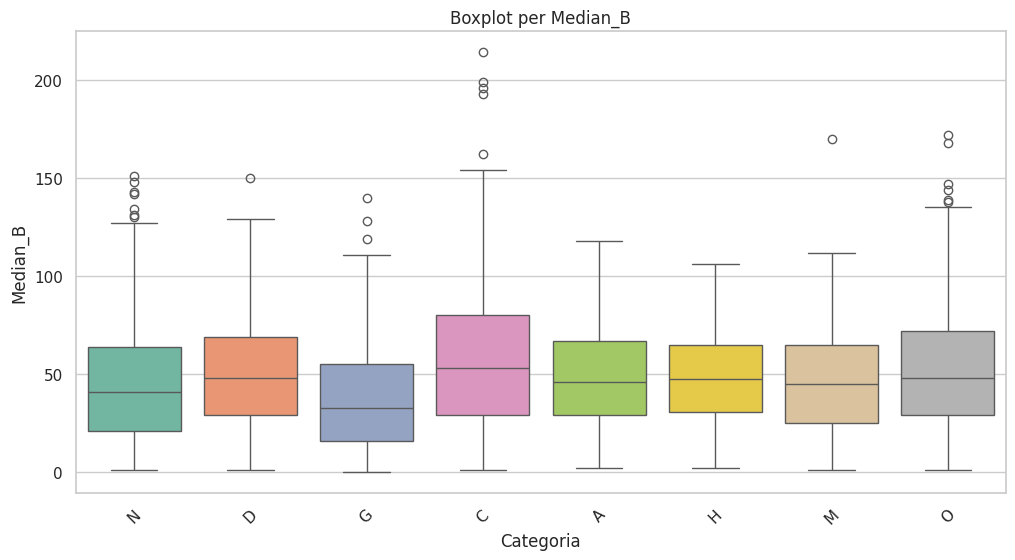

Confronto N vs D: stat=2065553.0000, p-value=4.0405e-09
 -> Differenza significativa tra N e D per Median_B (p < 0.05)
Confronto N vs G: stat=467099.0000, p-value=5.4447e-05
 -> Differenza significativa tra N e G per Median_B (p < 0.05)
Confronto N vs C: stat=344121.0000, p-value=2.5891e-07
 -> Differenza significativa tra N e C per Median_B (p < 0.05)
Confronto N vs A: stat=346381.0000, p-value=1.1515e-02
 -> Differenza significativa tra N e A per Median_B (p < 0.05)
Confronto N vs H: stat=167246.0000, p-value=8.3011e-02
 -> Nessuna differenza significativa tra N e H per Median_B
Confronto N vs M: stat=314619.5000, p-value=1.5565e-01
 -> Nessuna differenza significativa tra N e M per Median_B
Confronto N vs O: stat=891600.0000, p-value=3.5595e-07
 -> Differenza significativa tra N e O per Median_B (p < 0.05)
Analisi per il canale: Std_R


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


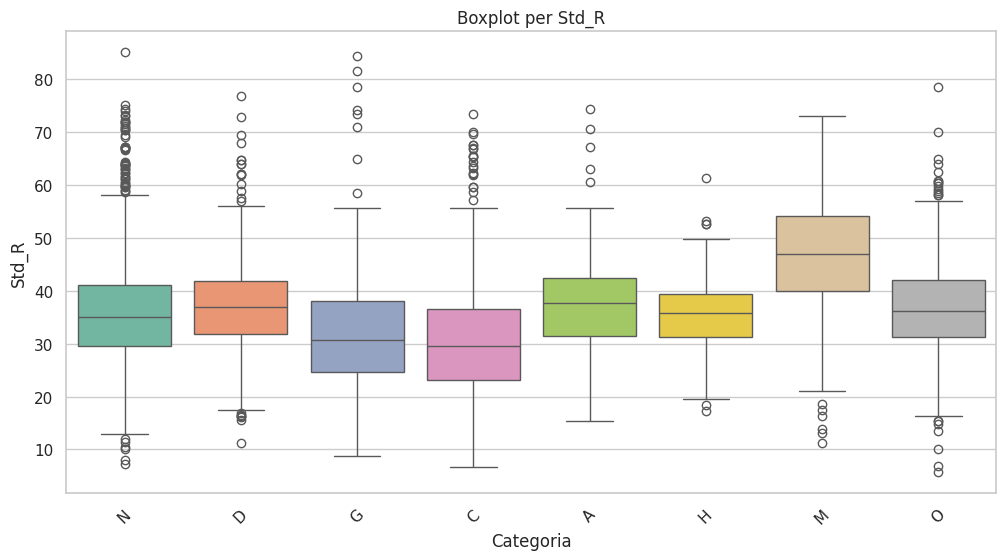

Confronto N vs D: stat=2077357.0000, p-value=2.1687e-08
 -> Differenza significativa tra N e D per Std_R (p < 0.05)
Confronto N vs G: stat=495148.0000, p-value=2.6893e-09
 -> Differenza significativa tra N e G per Std_R (p < 0.05)
Confronto N vs C: stat=539665.0000, p-value=1.6073e-15
 -> Differenza significativa tra N e C per Std_R (p < 0.05)
Confronto N vs A: stat=330732.0000, p-value=2.8000e-04
 -> Differenza significativa tra N e A per Std_R (p < 0.05)
Confronto N vs H: stat=179602.0000, p-value=6.5622e-01
 -> Nessuna differenza significativa tra N e H per Std_R
Confronto N vs M: stat=138764.0000, p-value=1.2945e-49
 -> Differenza significativa tra N e M per Std_R (p < 0.05)
Confronto N vs O: stat=933814.0000, p-value=7.3117e-04
 -> Differenza significativa tra N e O per Std_R (p < 0.05)
Analisi per il canale: Std_G


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


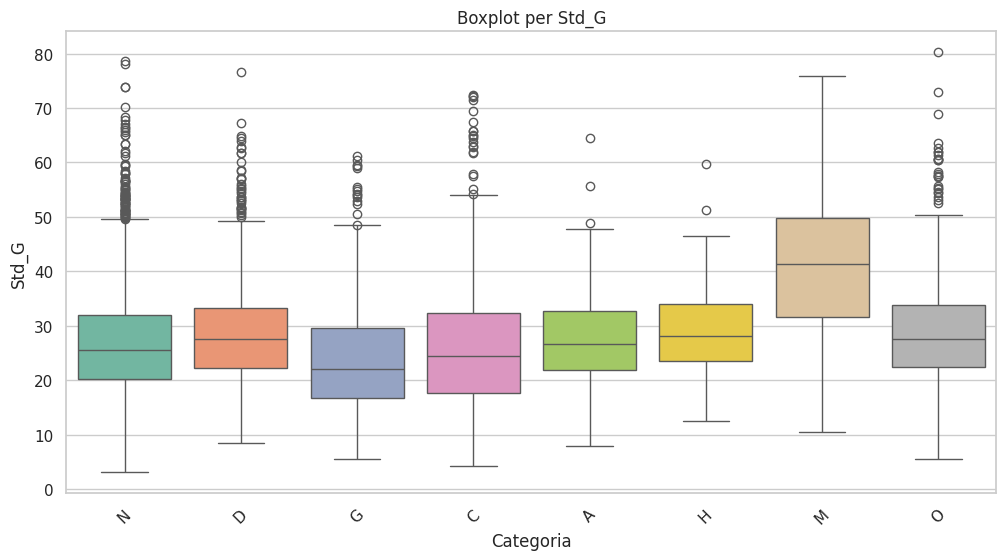

Confronto N vs D: stat=2021267.0000, p-value=3.6978e-12
 -> Differenza significativa tra N e D per Std_G (p < 0.05)
Confronto N vs G: stat=488567.0000, p-value=3.7890e-08
 -> Differenza significativa tra N e G per Std_G (p < 0.05)
Confronto N vs C: stat=446848.0000, p-value=8.1646e-02
 -> Nessuna differenza significativa tra N e C per Std_G
Confronto N vs A: stat=348693.0000, p-value=1.8127e-02
 -> Differenza significativa tra N e A per Std_G (p < 0.05)
Confronto N vs H: stat=149631.0000, p-value=3.5716e-04
 -> Differenza significativa tra N e H per Std_G (p < 0.05)
Confronto N vs M: stat=115341.0000, p-value=8.0163e-62
 -> Differenza significativa tra N e M per Std_G (p < 0.05)
Confronto N vs O: stat=883536.0000, p-value=6.0255e-08
 -> Differenza significativa tra N e O per Std_G (p < 0.05)
Analisi per il canale: Std_B


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


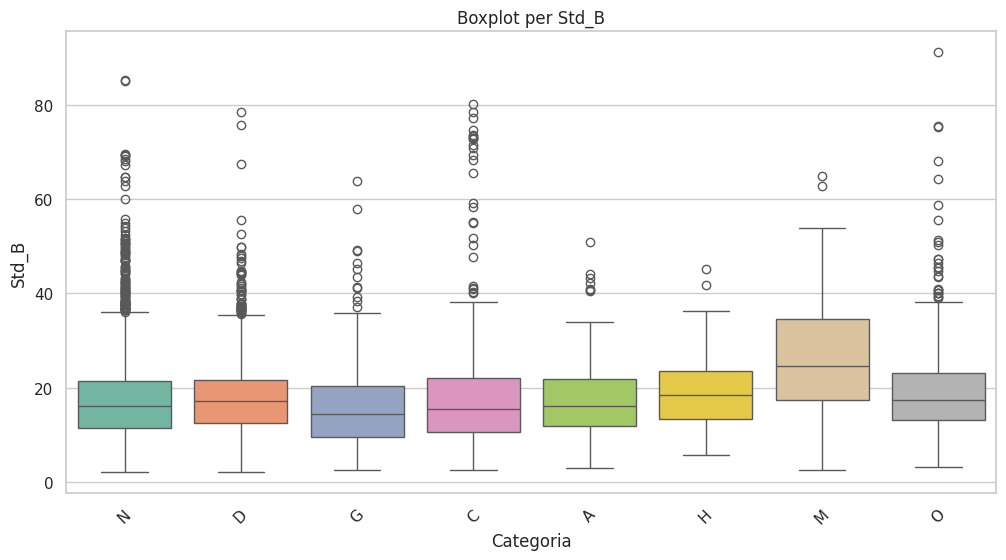

Confronto N vs D: stat=2172528.0000, p-value=9.4350e-04
 -> Differenza significativa tra N e D per Std_B (p < 0.05)
Confronto N vs G: stat=456848.0000, p-value=8.5049e-04
 -> Differenza significativa tra N e G per Std_B (p < 0.05)
Confronto N vs C: stat=427600.0000, p-value=6.5282e-01
 -> Nessuna differenza significativa tra N e C per Std_B
Confronto N vs A: stat=376634.0000, p-value=6.9866e-01
 -> Nessuna differenza significativa tra N e A per Std_B
Confronto N vs H: stat=158845.0000, p-value=9.0746e-03
 -> Differenza significativa tra N e H per Std_B (p < 0.05)
Confronto N vs M: stat=180894.0000, p-value=4.0830e-31
 -> Differenza significativa tra N e M per Std_B (p < 0.05)
Confronto N vs O: stat=905291.0000, p-value=5.7559e-06
 -> Differenza significativa tra N e O per Std_B (p < 0.05)
Analisi per il canale: Skewness_R


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


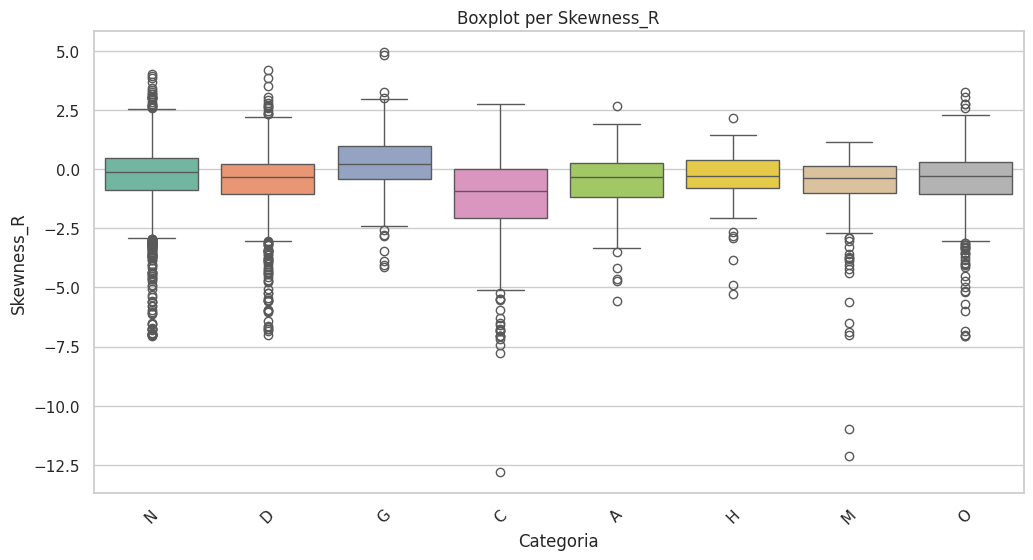

Confronto N vs D: stat=2580492.0000, p-value=7.3007e-11
 -> Differenza significativa tra N e D per Skewness_R (p < 0.05)
Confronto N vs G: stat=314711.0000, p-value=1.9662e-10
 -> Differenza significativa tra N e G per Skewness_R (p < 0.05)
Confronto N vs C: stat=570232.0000, p-value=1.2553e-23
 -> Differenza significativa tra N e C per Skewness_R (p < 0.05)
Confronto N vs A: stat=435919.0000, p-value=1.4170e-04
 -> Differenza significativa tra N e A per Skewness_R (p < 0.05)
Confronto N vs H: stat=193268.0000, p-value=3.2730e-01
 -> Nessuna differenza significativa tra N e H per Skewness_R
Confronto N vs M: stat=387887.0000, p-value=3.2060e-05
 -> Differenza significativa tra N e M per Skewness_R (p < 0.05)
Confronto N vs O: stat=1121824.0000, p-value=2.1155e-05
 -> Differenza significativa tra N e O per Skewness_R (p < 0.05)
Analisi per il canale: Skewness_G


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


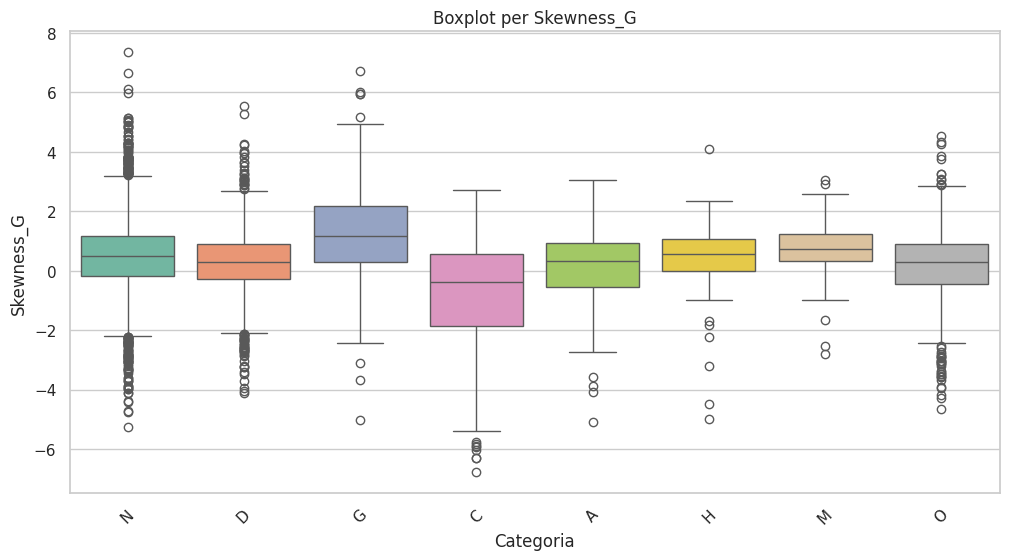

Confronto N vs D: stat=2546141.0000, p-value=1.2900e-08
 -> Differenza significativa tra N e D per Skewness_G (p < 0.05)
Confronto N vs G: stat=287767.0000, p-value=2.3505e-16
 -> Differenza significativa tra N e G per Skewness_G (p < 0.05)
Confronto N vs C: stat=592991.0000, p-value=7.7237e-31
 -> Differenza significativa tra N e C per Skewness_G (p < 0.05)
Confronto N vs A: stat=426624.0000, p-value=1.6446e-03
 -> Differenza significativa tra N e A per Skewness_G (p < 0.05)
Confronto N vs H: stat=179234.0000, p-value=6.2874e-01
 -> Nessuna differenza significativa tra N e H per Skewness_G
Confronto N vs M: stat=278804.0000, p-value=3.3757e-05
 -> Differenza significativa tra N e M per Skewness_G (p < 0.05)
Confronto N vs O: stat=1148946.0000, p-value=8.6493e-08
 -> Differenza significativa tra N e O per Skewness_G (p < 0.05)
Analisi per il canale: Skewness_B


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


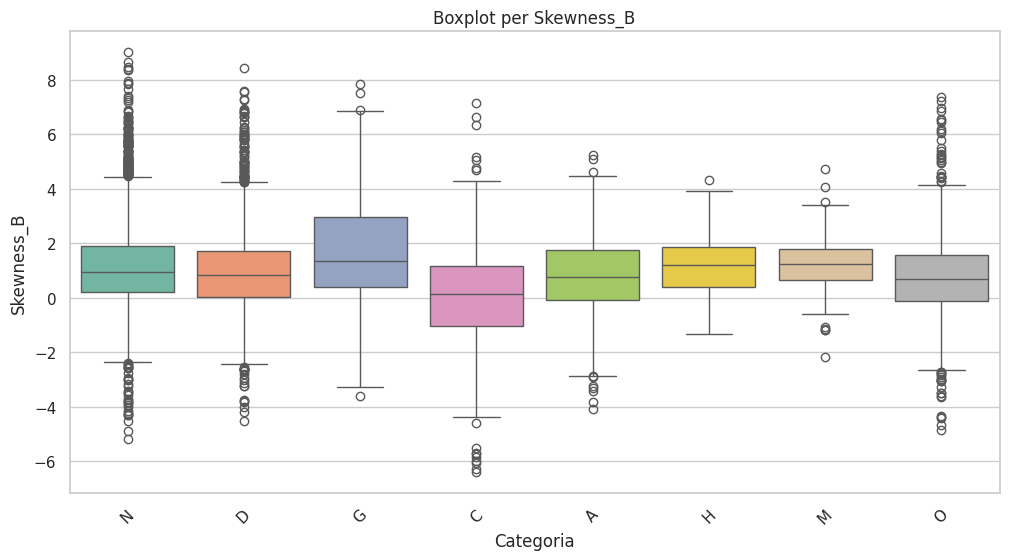

Confronto N vs D: stat=2449076.0000, p-value=8.0616e-04
 -> Differenza significativa tra N e D per Skewness_B (p < 0.05)
Confronto N vs G: stat=339979.0000, p-value=3.4909e-06
 -> Differenza significativa tra N e G per Skewness_B (p < 0.05)
Confronto N vs C: stat=564414.0000, p-value=6.0402e-22
 -> Differenza significativa tra N e C per Skewness_B (p < 0.05)
Confronto N vs A: stat=418877.0000, p-value=9.3211e-03
 -> Differenza significativa tra N e A per Skewness_B (p < 0.05)
Confronto N vs H: stat=169784.0000, p-value=1.4190e-01
 -> Nessuna differenza significativa tra N e H per Skewness_B
Confronto N vs M: stat=299932.0000, p-value=1.1150e-02
 -> Differenza significativa tra N e M per Skewness_B (p < 0.05)
Confronto N vs O: stat=1146770.0000, p-value=1.4040e-07
 -> Differenza significativa tra N e O per Skewness_B (p < 0.05)
Analisi per il canale: Kurtosis_R


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


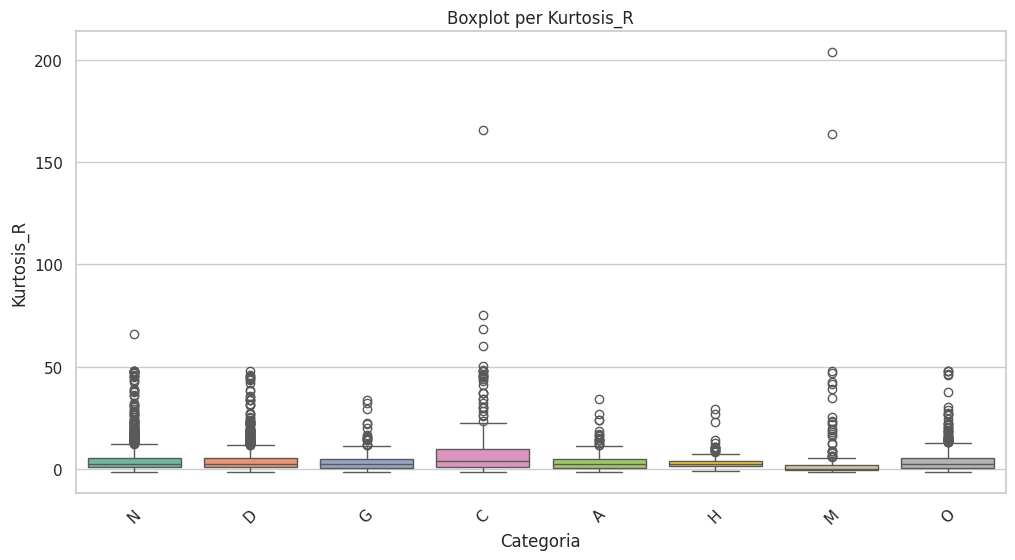

Confronto N vs D: stat=2268887.0000, p-value=3.2358e-01
 -> Nessuna differenza significativa tra N e D per Kurtosis_R
Confronto N vs G: stat=417719.0000, p-value=5.0571e-01
 -> Nessuna differenza significativa tra N e G per Kurtosis_R
Confronto N vs C: stat=341456.0000, p-value=9.8438e-08
 -> Differenza significativa tra N e C per Kurtosis_R (p < 0.05)
Confronto N vs A: stat=401572.0000, p-value=1.6873e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_R
Confronto N vs H: stat=175337.0000, p-value=3.7358e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_R
Confronto N vs M: stat=476304.0000, p-value=1.2885e-27
 -> Differenza significativa tra N e M per Kurtosis_R (p < 0.05)
Confronto N vs O: stat=1035350.0000, p-value=4.5750e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_R
Analisi per il canale: Kurtosis_G


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


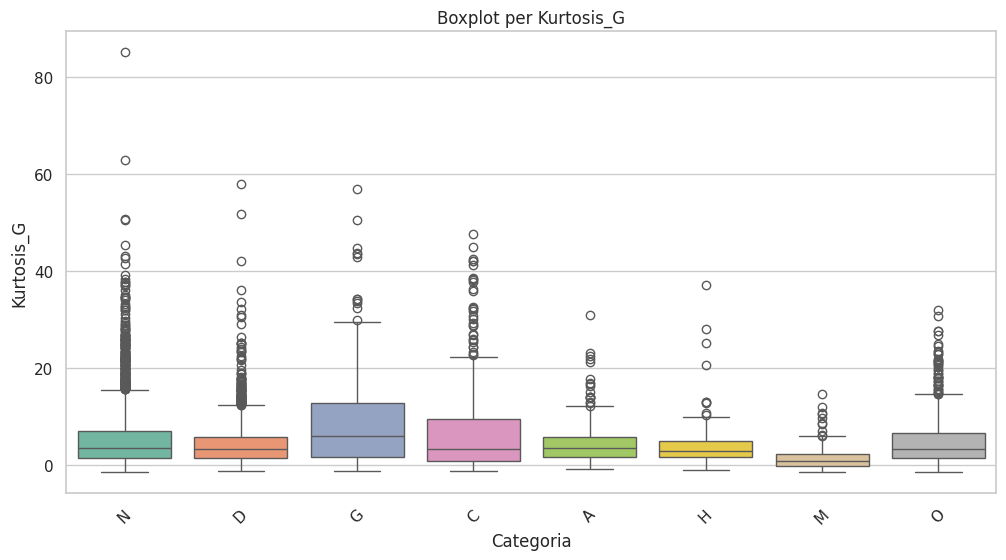

Confronto N vs D: stat=2416477.0000, p-value=1.0291e-02
 -> Differenza significativa tra N e D per Kurtosis_G (p < 0.05)
Confronto N vs G: stat=328321.0000, p-value=5.4743e-08
 -> Differenza significativa tra N e G per Kurtosis_G (p < 0.05)
Confronto N vs C: stat=422253.0000, p-value=9.2741e-01
 -> Nessuna differenza significativa tra N e C per Kurtosis_G
Confronto N vs A: stat=389061.0000, p-value=6.2302e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_G
Confronto N vs H: stat=196488.0000, p-value=1.8842e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_G
Confronto N vs M: stat=502523.0000, p-value=5.3967e-38
 -> Differenza significativa tra N e M per Kurtosis_G (p < 0.05)
Confronto N vs O: stat=1045534.0000, p-value=2.4757e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_G
Analisi per il canale: Kurtosis_B


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


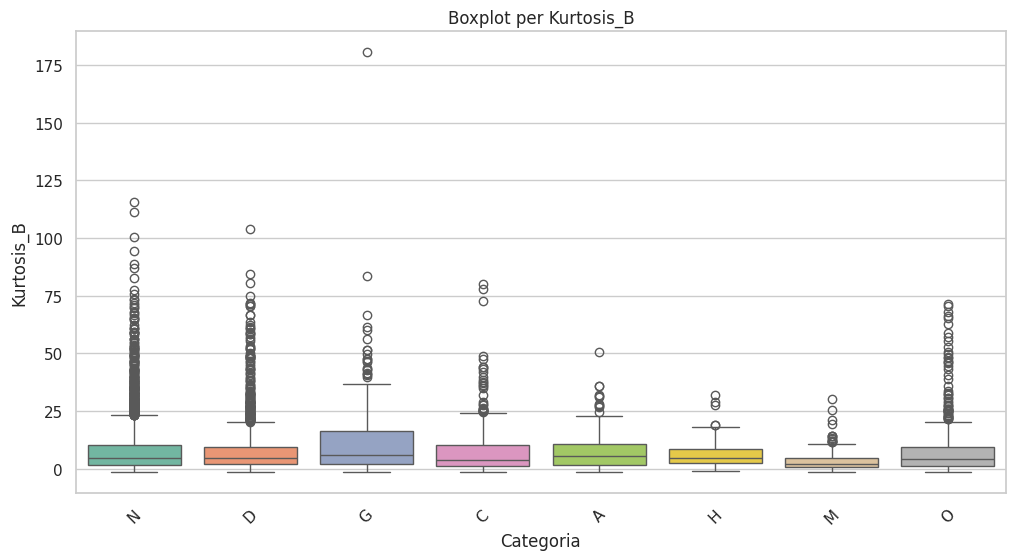

Confronto N vs D: stat=2254127.0000, p-value=1.7945e-01
 -> Nessuna differenza significativa tra N e D per Kurtosis_B
Confronto N vs G: stat=360328.0000, p-value=1.1503e-03
 -> Differenza significativa tra N e G per Kurtosis_B (p < 0.05)
Confronto N vs C: stat=433562.0000, p-value=3.9541e-01
 -> Nessuna differenza significativa tra N e C per Kurtosis_B
Confronto N vs A: stat=374267.0000, p-value=5.7922e-01
 -> Nessuna differenza significativa tra N e A per Kurtosis_B
Confronto N vs H: stat=181697.0000, p-value=8.2065e-01
 -> Nessuna differenza significativa tra N e H per Kurtosis_B
Confronto N vs M: stat=430540.0000, p-value=1.3050e-13
 -> Differenza significativa tra N e M per Kurtosis_B (p < 0.05)
Confronto N vs O: stat=1050714.0000, p-value=1.7179e-01
 -> Nessuna differenza significativa tra N e O per Kurtosis_B


In [ ]:
results_MWU_RGB= []
# Analisi per ciascun canale RGB
for channel_RGB in channels_RGB:
    analyze_channel(RGB_df, channel_RGB, categories,results_MWU_RGB)


# Crea un DataFrame dai risultati
mwu_RGB_df = pd.DataFrame(results_MWU_RGB)

# Salva i risultati su un file CSV
mwu_RGB_df.to_csv("mwu_RGB_df.csv", index=False)

In [ ]:
files.download('mwu_RGB_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---

# TEXTURE DESCRIPTORS

In [ ]:
#TEXTURE DESCRIPTORS
#entropia
from skimage import io
from skimage.color import rgb2gray
import os

def calculate_entropy_and_histogram(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Normalize the histogram
    hist_norm = hist / hist.sum()
    # Remove zero probabilities
    hist_norm = hist_norm[hist_norm > 0]
    # Calculate entropy
    entropy = -np.sum(hist_norm * np.log2(hist_norm))
    return entropy

# Calcola l'entropia per tutte le immagini
entropy_results = []

for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr=cv2.imread(immaginipath+'/'+file,cv2.IMREAD_COLOR)
    img_gray=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    img_entropy = calculate_entropy_and_histogram(img_gray)
    entropy_results.append({'Category': category, 'Image': file, 'Entropy': img_entropy})

# Salva i risultati in un DataFrame
entropy_df = pd.DataFrame(entropy_results)

# Salva su CSV per future analisi
entropy_df.to_csv('entropy_results.csv', index=False)
print("Entropia calcolata e salvata in entropy_results.csv.")

print(entropy_df.head())

Entropia calcolata e salvata in entropy_results.csv.
  Category         Image   Entropy
0        N   0_right.jpg  5.153260
1        N   1_right.jpg  6.167973
2        N   8_right.jpg  6.255137
3        N  10_right.jpg  5.606169
4        N  29_right.jpg  6.001006


In [ ]:
# Test di Shapiro-Wilk
shapiro_test(['Entropy'], entropy_df, categories)



Test di normalità per Entropy:
Categoria N: stat=0.9906, p-value=8.7810e-13
Categoria D: stat=0.9873, p-value=1.0934e-10
Categoria G: stat=0.9938, p-value=3.0013e-01
 -> La distribuzione per G è normale (p-value > 0.05).
Categoria C: stat=0.9824, p-value=1.1201e-03
Categoria A: stat=0.9890, p-value=4.0081e-02
Categoria H: stat=0.9740, p-value=1.4403e-02
Categoria M: stat=0.9832, p-value=7.6048e-03
Categoria O: stat=0.9820, p-value=1.1813e-07


Analisi per il canale: Entropy


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


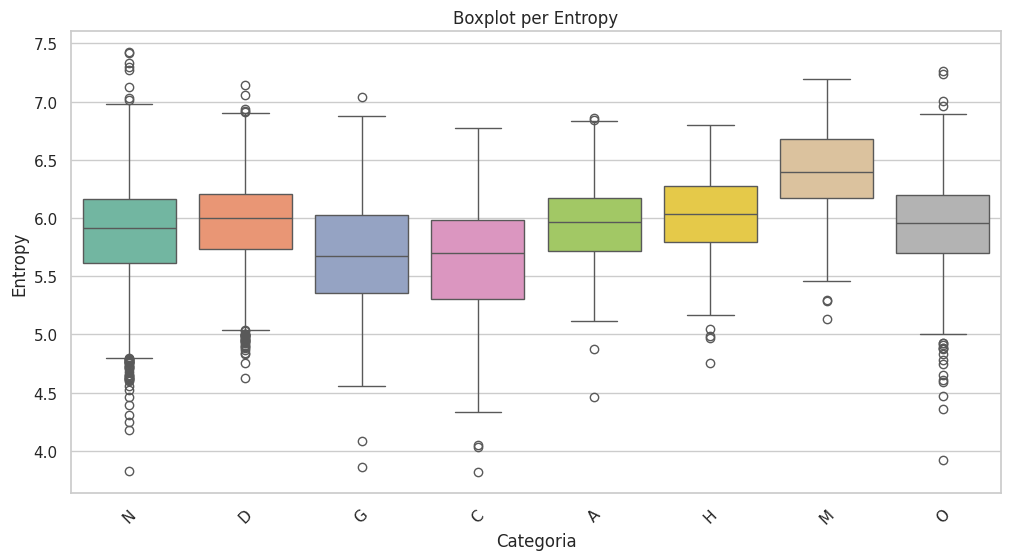

Confronto N vs D: stat=2020417.5000, p-value=3.1982e-12
 -> Differenza significativa tra N e D per Entropy (p < 0.05)
Confronto N vs G: stat=502302.0000, p-value=1.2127e-10
 -> Differenza significativa tra N e G per Entropy (p < 0.05)
Confronto N vs C: stat=531109.5000, p-value=1.4203e-13
 -> Differenza significativa tra N e C per Entropy (p < 0.05)
Confronto N vs A: stat=345081.0000, p-value=8.8334e-03
 -> Differenza significativa tra N e A per Entropy (p < 0.05)
Confronto N vs H: stat=144787.0000, p-value=4.6034e-05
 -> Differenza significativa tra N e H per Entropy (p < 0.05)
Confronto N vs M: stat=108332.5000, p-value=9.6312e-66
 -> Differenza significativa tra N e M per Entropy (p < 0.05)
Confronto N vs O: stat=926130.0000, p-value=2.2474e-04
 -> Differenza significativa tra N e O per Entropy (p < 0.05)


In [ ]:
from scipy.stats import mannwhitneyu

results_MWU_entropy=[]
analyze_channel(entropy_df, 'Entropy', categories, results_MWU_entropy)


# Crea un DataFrame dai risultati
mwu_entropy_df = pd.DataFrame(results_MWU_entropy)

# Salva i risultati su un file CSV
mwu_entropy_df.to_csv("mwu_entropy_df.csv", index=False)

In [ ]:
files.download('mwu_entropy_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#CONFRONTO TRA LE MALATTIE


'''from itertools import combinations
from scipy.stats import mannwhitneyu

def analyze_entropy_all_pairs(df, categories):
    print("Confronti tra tutte le categorie per l'entropia\n")

    # Creazione dei confronti a coppie
    for cat1, cat2 in combinations(categories, 2):
        values_cat1 = df[df['Category'] == cat1]['Entropy'].dropna()
        values_cat2 = df[df['Category'] == cat2]['Entropy'].dropna()

        # Test di Mann-Whitney U (non parametrico)
        stat, p_value = mannwhitneyu(values_cat1, values_cat2, alternative='two-sided')

        # Stampa dei risultati
        print(f"Confronto {cat1} vs {cat2}: stat={stat:.4f}, p-value={p_value:.4e}")

        if p_value < 0.05:
            print(f" -> Differenza significativa tra {cat1} e {cat2} (p < 0.05)\n")
        else:
            print(f" -> Nessuna differenza significativa tra {cat1} e {cat2}\n")
# Esegui il confronto tra tutte le categorie
analyze_entropy_all_pairs(entropy_df, categories)'''

'from itertools import combinations\nfrom scipy.stats import mannwhitneyu\n\ndef analyze_entropy_all_pairs(df, categories):\n    print("Confronti tra tutte le categorie per l\'entropia\n")\n\n    # Creazione dei confronti a coppie\n    for cat1, cat2 in combinations(categories, 2):\n        values_cat1 = df[df[\'Category\'] == cat1][\'Entropy\'].dropna()\n        values_cat2 = df[df[\'Category\'] == cat2][\'Entropy\'].dropna()\n\n        # Test di Mann-Whitney U (non parametrico)\n        stat, p_value = mannwhitneyu(values_cat1, values_cat2, alternative=\'two-sided\')\n\n        # Stampa dei risultati\n        print(f"Confronto {cat1} vs {cat2}: stat={stat:.4f}, p-value={p_value:.4e}")\n\n        if p_value < 0.05:\n            print(f" -> Differenza significativa tra {cat1} e {cat2} (p < 0.05)\n")\n        else:\n            print(f" -> Nessuna differenza significativa tra {cat1} e {cat2}\n")\n# Esegui il confronto tra tutte le categorie\nanalyze_entropy_all_pairs(entropy_df, categor



---
# GLCM


In [ ]:
#GLCM
from skimage.feature import graycomatrix, graycoprops

distances = [1, 2, 3]  # Distances between pixel pairs
angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Angles (0°, 45°, 90°, 135°)

def calculate_glcm_features(image, distances, angles, levels=8):
    """
    Calculate GLCM and extract texture features.

    Parameters:
        - image: Grayscale input image
        - distances: List of pixel pair distances for GLCM computation
        - angles: List of angles (in radians) for GLCM computation
        - levels: Number of gray levels in the image
    Returns:
        - averaged_features: Dictionary with the average values of GLCM features
    """
    features = {'contrast': [], 'correlation': [], 'energy': [], 'homogeneity': []}

    for d in distances:
        for a in angles:
            # Calculate GLCM for each combination of distance and angle
            glcm = graycomatrix(image, distances=[d], angles=[a], levels=levels, symmetric=True, normed=True)

            # Append each feature to the respective list
            features['contrast'].append(graycoprops(glcm, 'contrast')[0, 0])
            features['correlation'].append(graycoprops(glcm, 'correlation')[0, 0])
            features['energy'].append(graycoprops(glcm, 'energy')[0, 0])
            features['homogeneity'].append(graycoprops(glcm, 'homogeneity')[0, 0])

    # Compute the average for each feature
    averaged_features = {key: np.mean(value) for key, value in features.items()}

    return averaged_features

# DataFrame to store GLCM features
columns = ['Image', 'Category', 'contrast_mean', 'correlation_mean', 'energy_mean', 'homogeneity_mean']
rows = []

# Loop through the images
for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
    for file in images:
        img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)

        # Preprocess the image
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        normalized_image = (img_gray / (256 // 8)).astype('uint8')

        # Calculate GLCM features
        features_glcm = calculate_glcm_features(normalized_image, distances, angles)

        # Add results to the rows list
        row = {
            'Image': file,
            'Category': category,
            'contrast_mean': features_glcm['contrast'],
            'correlation_mean': features_glcm['correlation'],
            'energy_mean': features_glcm['energy'],
            'homogeneity_mean': features_glcm['homogeneity']
        }
        rows.append(row)

# Create the DataFrame
glcm_df = pd.DataFrame(rows, columns=columns)


In [ ]:
print(glcm_df.head())

          Image Category  contrast_mean  correlation_mean  energy_mean  \
0   0_right.jpg        N       0.035954          0.959683     0.632553   
1   1_right.jpg        N       0.145346          0.973464     0.458642   
2   8_right.jpg        N       0.127592          0.965374     0.444274   
3  10_right.jpg        N       0.147923          0.956655     0.582288   
4  29_right.jpg        N       0.106885          0.955098     0.493474   

   homogeneity_mean  
0          0.985023  
1          0.943730  
2          0.944903  
3          0.956199  
4          0.969732  


In [ ]:
# Shapiro-Wilk Test for Normality

channels_glcm=['contrast_mean', 'correlation_mean', 'energy_mean', 'homogeneity_mean']

shapiro_test(channels_glcm, glcm_df, categories)
#p-value = 0 suggerisce che la discrepanza tra i dati e la distribuzione normale è così significativa che non può essere attribuita al caso.



Test di normalità per contrast_mean:
Categoria N: stat=0.9224, p-value=3.7779e-36
Categoria D: stat=0.9182, p-value=1.1830e-28
Categoria G: stat=0.9327, p-value=4.6847e-10
Categoria C: stat=0.8923, p-value=1.4685e-13
Categoria A: stat=0.9652, p-value=4.7330e-06
Categoria H: stat=0.8829, p-value=1.2943e-08
Categoria M: stat=0.9408, p-value=4.4311e-08
Categoria O: stat=0.9414, p-value=4.2510e-16

Test di normalità per correlation_mean:
Categoria N: stat=0.6353, p-value=2.3024e-61
Categoria D: stat=0.8052, p-value=2.8770e-40
Categoria G: stat=0.7422, p-value=9.7887e-21
Categoria C: stat=0.3022, p-value=8.2420e-32
Categoria A: stat=0.5007, p-value=9.4056e-27
Categoria H: stat=0.8693, p-value=3.0215e-09
Categoria M: stat=0.6885, p-value=1.8101e-20
Categoria O: stat=0.8176, p-value=1.4505e-27

Test di normalità per energy_mean:
Categoria N: stat=0.9413, p-value=2.5283e-32
Categoria D: stat=0.9487, p-value=2.9111e-23
Categoria G: stat=0.9533, p-value=6.9924e-08
Categoria C: stat=0.9468, p-va

Analisi per il canale: contrast_mean


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


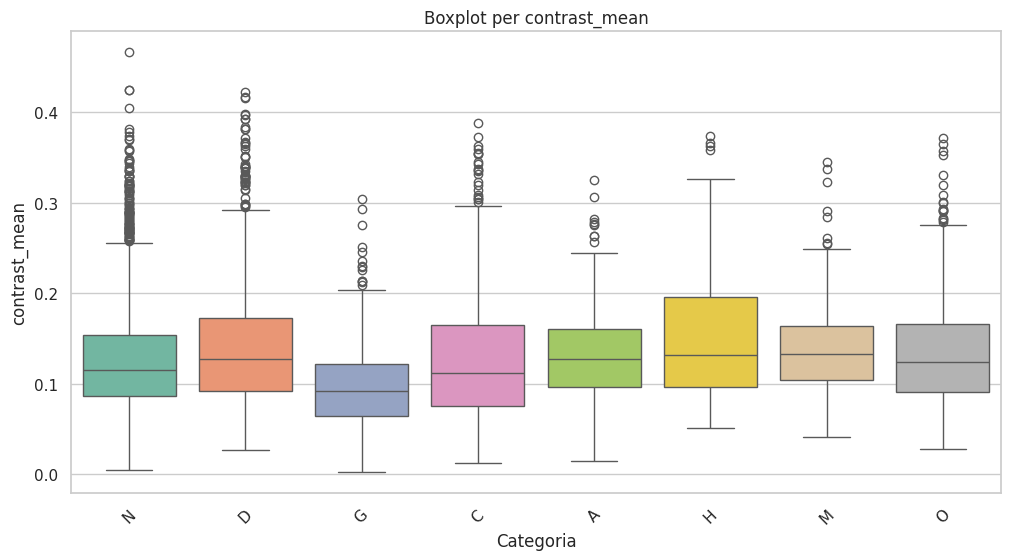

Confronto N vs D: stat=2028921.0000, p-value=1.3422e-11
 -> Differenza significativa tra N e D per contrast_mean (p < 0.05)
Confronto N vs G: stat=522519.0000, p-value=5.3927e-15
 -> Differenza significativa tra N e G per contrast_mean (p < 0.05)
Confronto N vs C: stat=434406.0000, p-value=3.6469e-01
 -> Nessuna differenza significativa tra N e C per contrast_mean
Confronto N vs A: stat=343580.0000, p-value=6.4384e-03
 -> Differenza significativa tra N e A per contrast_mean (p < 0.05)
Confronto N vs H: stat=147108.0000, p-value=1.2663e-04
 -> Differenza significativa tra N e H per contrast_mean (p < 0.05)
Confronto N vs M: stat=275026.0000, p-value=9.2435e-06
 -> Differenza significativa tra N e M per contrast_mean (p < 0.05)
Confronto N vs O: stat=916180.0000, p-value=4.2536e-05
 -> Differenza significativa tra N e O per contrast_mean (p < 0.05)
Analisi per il canale: correlation_mean


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


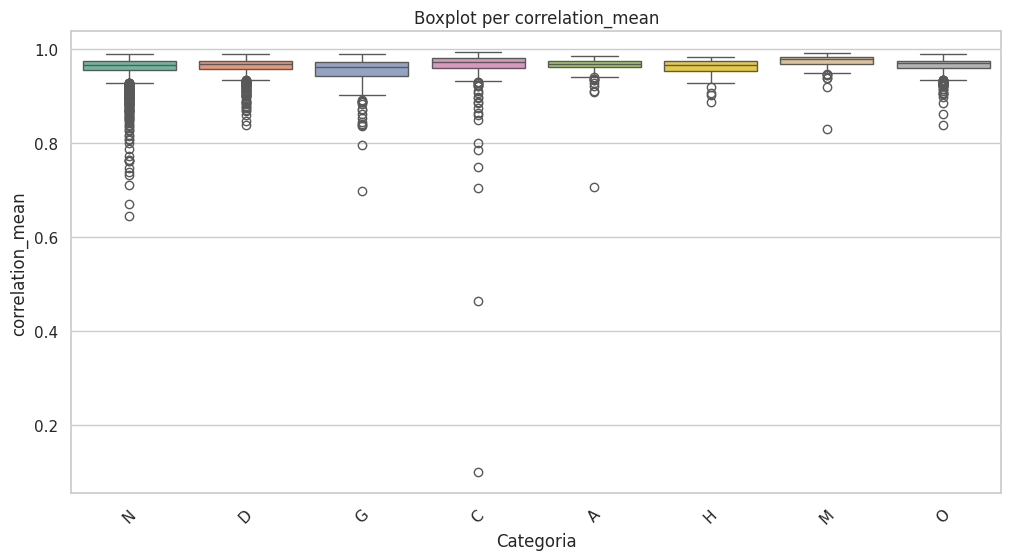

Confronto N vs D: stat=2110990.0000, p-value=1.6819e-06
 -> Differenza significativa tra N e D per correlation_mean (p < 0.05)
Confronto N vs G: stat=461418.0000, p-value=2.6461e-04
 -> Differenza significativa tra N e G per correlation_mean (p < 0.05)
Confronto N vs C: stat=312143.0000, p-value=2.9595e-13
 -> Differenza significativa tra N e C per correlation_mean (p < 0.05)
Confronto N vs A: stat=325339.0000, p-value=5.9570e-05
 -> Differenza significativa tra N e A per correlation_mean (p < 0.05)
Confronto N vs H: stat=185624.0000, p-value=8.5510e-01
 -> Nessuna differenza significativa tra N e H per correlation_mean
Confronto N vs M: stat=159315.0000, p-value=4.9082e-40
 -> Differenza significativa tra N e M per correlation_mean (p < 0.05)
Confronto N vs O: stat=868148.0000, p-value=1.5171e-09
 -> Differenza significativa tra N e O per correlation_mean (p < 0.05)
Analisi per il canale: energy_mean


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


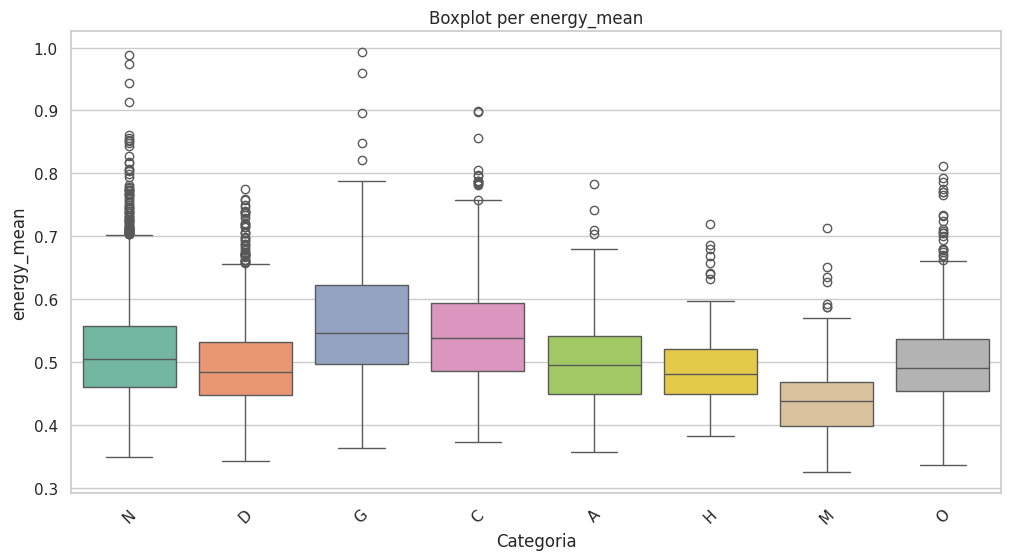

Confronto N vs D: stat=2678038.0000, p-value=7.8138e-19
 -> Differenza significativa tra N e D per energy_mean (p < 0.05)
Confronto N vs G: stat=280185.0000, p-value=2.7792e-18
 -> Differenza significativa tra N e G per energy_mean (p < 0.05)
Confronto N vs C: stat=318728.0000, p-value=7.1597e-12
 -> Differenza significativa tra N e C per energy_mean (p < 0.05)
Confronto N vs A: stat=424247.0000, p-value=2.8844e-03
 -> Differenza significativa tra N e A per energy_mean (p < 0.05)
Confronto N vs H: stat=221494.0000, p-value=8.7682e-05
 -> Differenza significativa tra N e H per energy_mean (p < 0.05)
Confronto N vs M: stat=528188.0000, p-value=8.0777e-50
 -> Differenza significativa tra N e M per energy_mean (p < 0.05)
Confronto N vs O: stat=1134382.0000, p-value=1.9170e-06
 -> Differenza significativa tra N e O per energy_mean (p < 0.05)
Analisi per il canale: homogeneity_mean


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


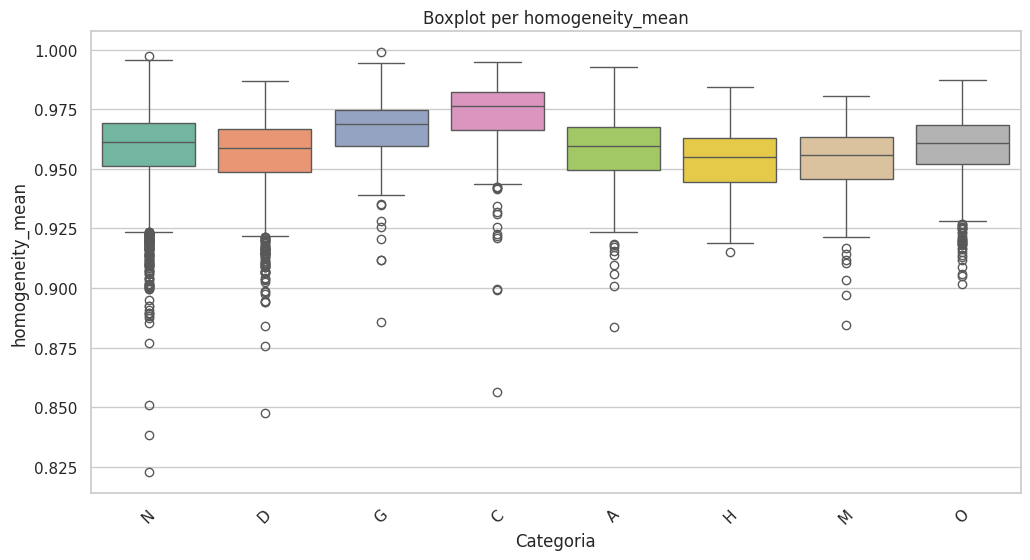

Confronto N vs D: stat=2561621.0000, p-value=1.3608e-09
 -> Differenza significativa tra N e D per homogeneity_mean (p < 0.05)
Confronto N vs G: stat=287423.0000, p-value=1.9329e-16
 -> Differenza significativa tra N e G per homogeneity_mean (p < 0.05)
Confronto N vs C: stat=188917.0000, p-value=1.2867e-54
 -> Differenza significativa tra N e C per homogeneity_mean (p < 0.05)
Confronto N vs A: stat=404023.0000, p-value=1.2123e-01
 -> Nessuna differenza significativa tra N e A per homogeneity_mean
Confronto N vs H: stat=229962.0000, p-value=1.5457e-06
 -> Differenza significativa tra N e H per homogeneity_mean (p < 0.05)
Confronto N vs M: stat=408255.0000, p-value=1.1363e-08
 -> Differenza significativa tra N e M per homogeneity_mean (p < 0.05)
Confronto N vs O: stat=1027716.0000, p-value=6.6490e-01
 -> Nessuna differenza significativa tra N e O per homogeneity_mean


In [ ]:
from scipy.stats import mannwhitneyu

results_MWU_glcm= []

for channel_glcm in channels_glcm:
    analyze_channel(glcm_df, channel_glcm, categories,results_MWU_glcm)


# Crea un DataFrame dai risultati
mwu_glcm_df = pd.DataFrame(results_MWU_glcm)

# Salva i risultati su un file CSV
mwu_glcm_df.to_csv("mwu_glcm_df.csv", index=False)

In [ ]:
files.download('mwu_glcm_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---

# SHAPE DESCRIPTORS

In [ ]:
import cv2
def extract_edge_features(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Sobel Edge Detection
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = np.hypot(sobel_x, sobel_y)

    # Canny Edge Detection
    canny_edges = cv2.Canny(gray_image, 100, 200)

    features = {
        'sobel_mean': np.mean(sobel_edges),
        'sobel_std': np.std(sobel_edges),
        'canny_density': np.sum(canny_edges > 0) / gray_image.size
    }
    return features
columns = ['Image', 'Category', 'sobel_mean','sobel_std', 'canny_density']
rows = []
for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)
    features_shape = extract_edge_features(img_bgr)
    row = {'Image': file, 'Category': category}
    row.update(features_shape)
    rows.append(row)

# Create the DataFrame
shape_df = pd.DataFrame(rows, columns=columns)


In [ ]:
print(shape_df.head())

          Image Category  sobel_mean  sobel_std  canny_density
0   0_right.jpg        N    8.714341  24.502454       0.006882
1   1_right.jpg        N   20.042303  40.030665       0.009018
2   8_right.jpg        N   20.157983  32.926632       0.007198
3  10_right.jpg        N   17.906068  46.288454       0.005718
4  29_right.jpg        N   12.277896  41.909415       0.006874


In [ ]:
# Shapiro-Wilk Test for Normality

channels_shape=['sobel_mean','sobel_std', 'canny_density']
shapiro_test(channels_shape, shape_df, categories)



Test di normalità per sobel_mean:
Categoria N: stat=0.9575, p-value=3.3180e-28
Categoria D: stat=0.9370, p-value=1.4558e-25
Categoria G: stat=0.8692, p-value=8.2141e-15
Categoria C: stat=0.8915, p-value=1.2924e-13
Categoria A: stat=0.9339, p-value=1.5749e-09
Categoria H: stat=0.9438, p-value=4.4769e-05
Categoria M: stat=0.9616, p-value=6.9900e-06
Categoria O: stat=0.9789, p-value=1.4595e-08

Test di normalità per sobel_std:
Categoria N: stat=0.9708, p-value=9.2917e-24
Categoria D: stat=0.9747, p-value=3.2065e-16
Categoria G: stat=0.9530, p-value=6.3756e-08
Categoria C: stat=0.9439, p-value=4.0545e-09
Categoria A: stat=0.9726, p-value=5.5156e-05
Categoria H: stat=0.9322, p-value=7.1921e-06
Categoria M: stat=0.9729, p-value=2.0386e-04
Categoria O: stat=0.9793, p-value=1.8140e-08

Test di normalità per canny_density:
Categoria N: stat=0.6883, p-value=1.7032e-58
Categoria D: stat=0.6268, p-value=2.5117e-50
Categoria G: stat=0.2575, p-value=3.9099e-32
Categoria C: stat=0.7179, p-value=6.18

Analisi per il canale: sobel_mean


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


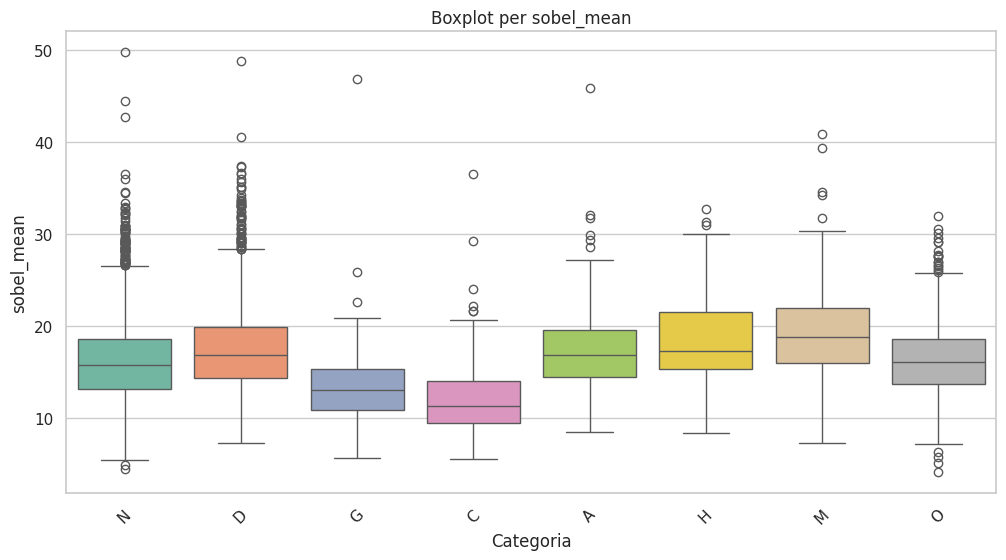

Confronto N vs D: stat=1934124.0000, p-value=1.4812e-19
 -> Differenza significativa tra N e D per sobel_mean (p < 0.05)
Confronto N vs G: stat=572592.0000, p-value=2.7598e-29
 -> Differenza significativa tra N e G per sobel_mean (p < 0.05)
Confronto N vs C: stat=660796.0000, p-value=2.7557e-58
 -> Differenza significativa tra N e C per sobel_mean (p < 0.05)
Confronto N vs A: stat=322803.0000, p-value=2.7427e-05
 -> Differenza significativa tra N e A per sobel_mean (p < 0.05)
Confronto N vs H: stat=131322.0000, p-value=4.2835e-08
 -> Differenza significativa tra N e H per sobel_mean (p < 0.05)
Confronto N vs M: stat=216181.0000, p-value=4.9112e-19
 -> Differenza significativa tra N e M per sobel_mean (p < 0.05)
Confronto N vs O: stat=963936.0000, p-value=3.1148e-02
 -> Differenza significativa tra N e O per sobel_mean (p < 0.05)
Analisi per il canale: sobel_std


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


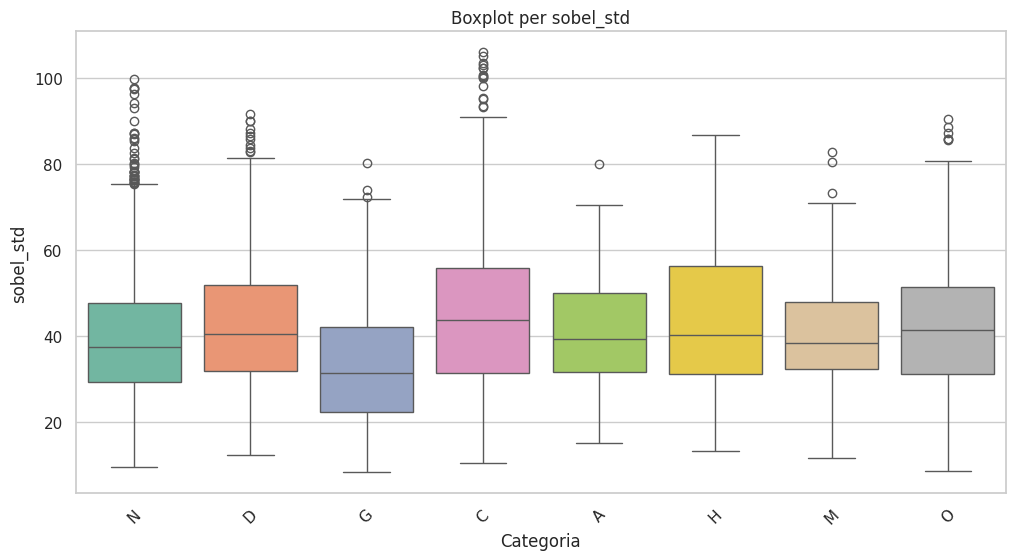

Confronto N vs D: stat=2013861.0000, p-value=1.0290e-12
 -> Differenza significativa tra N e D per sobel_std (p < 0.05)
Confronto N vs G: stat=508565.0000, p-value=6.6428e-12
 -> Differenza significativa tra N e G per sobel_std (p < 0.05)
Confronto N vs C: stat=339860.0000, p-value=5.4288e-08
 -> Differenza significativa tra N e C per sobel_std (p < 0.05)
Confronto N vs A: stat=342562.0000, p-value=5.1649e-03
 -> Differenza significativa tra N e A per sobel_std (p < 0.05)
Confronto N vs H: stat=151980.0000, p-value=8.8429e-04
 -> Differenza significativa tra N e H per sobel_std (p < 0.05)
Confronto N vs M: stat=304976.0000, p-value=3.1245e-02
 -> Differenza significativa tra N e M per sobel_std (p < 0.05)
Confronto N vs O: stat=881812.0000, p-value=4.0649e-08
 -> Differenza significativa tra N e O per sobel_std (p < 0.05)
Analisi per il canale: canny_density


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


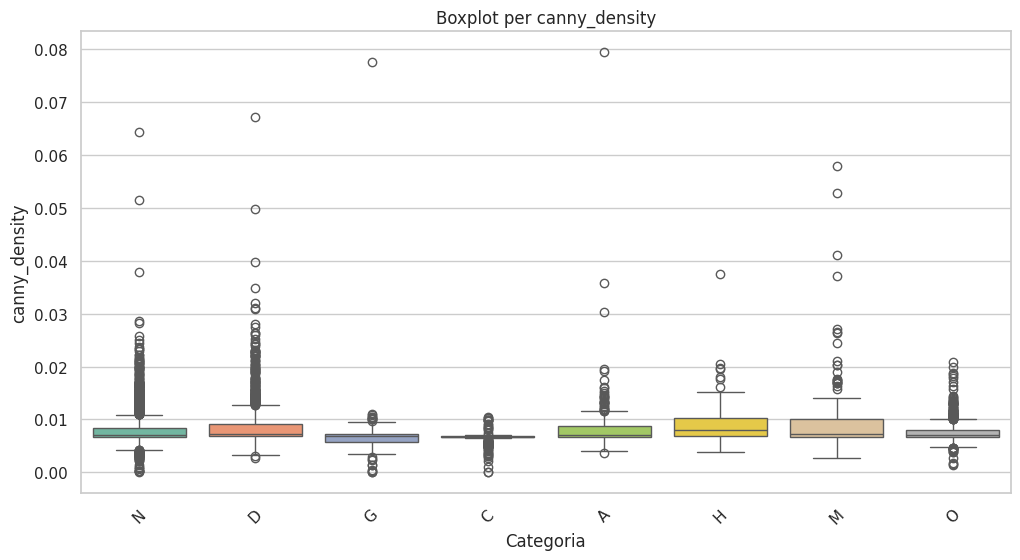

Confronto N vs D: stat=2009042.5000, p-value=4.4022e-13
 -> Differenza significativa tra N e D per canny_density (p < 0.05)
Confronto N vs G: stat=521047.5000, p-value=1.1910e-14
 -> Differenza significativa tra N e G per canny_density (p < 0.05)
Confronto N vs C: stat=603502.5000, p-value=1.6515e-34
 -> Differenza significativa tra N e C per canny_density (p < 0.05)
Confronto N vs A: stat=370990.5000, p-value=4.3174e-01
 -> Nessuna differenza significativa tra N e A per canny_density
Confronto N vs H: stat=140011.5000, p-value=4.8125e-06
 -> Differenza significativa tra N e H per canny_density (p < 0.05)
Confronto N vs M: stat=309051.5000, p-value=6.5232e-02
 -> Nessuna differenza significativa tra N e M per canny_density
Confronto N vs O: stat=1034434.5000, p-value=4.8030e-01
 -> Nessuna differenza significativa tra N e O per canny_density


In [ ]:
# Mann-Whitney U Test for differences between Normal and Pathological Categories

results_MWU_shape= []
# Analisi per ciascun canale RGB
for channel_shape in channels_shape:
    analyze_channel(shape_df, channel_shape, categories,results_MWU_shape)


# Crea un DataFrame dai risultati
mwu_shape_df = pd.DataFrame(results_MWU_shape)

# Salva i risultati su un file CSV
mwu_shape_df.to_csv("mwu_shape_df.csv", index=False)

In [ ]:
files.download('mwu_shape_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---
# VESSEL DENSITY


In [ ]:
def extract_vessel_density(image):
    # Use the green channel as it often highlights vessels better
    green_channel = image[:, :, 1]

    # Thresholding for vessel segmentation
    _, binary_vessels = cv2.threshold(green_channel, 50, 255, cv2.THRESH_BINARY_INV)

    vessel_density = np.sum(binary_vessels > 0) / green_channel.size
    return {'vessel_density': vessel_density}


columns = ['Image', 'Category', 'vessel_density']
rows = []
for category, images in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], TOT):
  for file in images:
    img_bgr = cv2.imread(immaginipath + '/' + file, cv2.IMREAD_COLOR)
    features_shape = extract_vessel_density(img_bgr)
    row = {'Image': file, 'Category': category}
    row.update(features_shape)
    rows.append(row)

# Create the DataFrame
vessel_df = pd.DataFrame(rows, columns=columns)
print(vessel_df.head())

          Image Category  vessel_density
0   0_right.jpg        N        0.554722
1   1_right.jpg        N        0.219913
2   8_right.jpg        N        0.383724
3  10_right.jpg        N        0.155235
4  29_right.jpg        N        0.376652


In [ ]:
# Test di Shapiro-Wilk per ciascuna categoria
shapiro_test(['vessel_density'], vessel_df, categories)



Test di normalità per vessel_density:
Categoria N: stat=0.7854, p-value=5.9591e-52
Categoria D: stat=0.7012, p-value=9.3429e-47
Categoria G: stat=0.8784, p-value=3.0680e-14
Categoria C: stat=0.6782, p-value=2.9870e-23
Categoria A: stat=0.7591, p-value=1.9003e-19
Categoria H: stat=0.7173, p-value=2.1845e-14
Categoria M: stat=0.8655, p-value=2.0527e-13
Categoria O: stat=0.7607, p-value=8.4563e-31


Analisi per il canale: vessel_density


<ipython-input-7-b0c90ac9092c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y=channel, data=df, order=categories, palette='Set2')


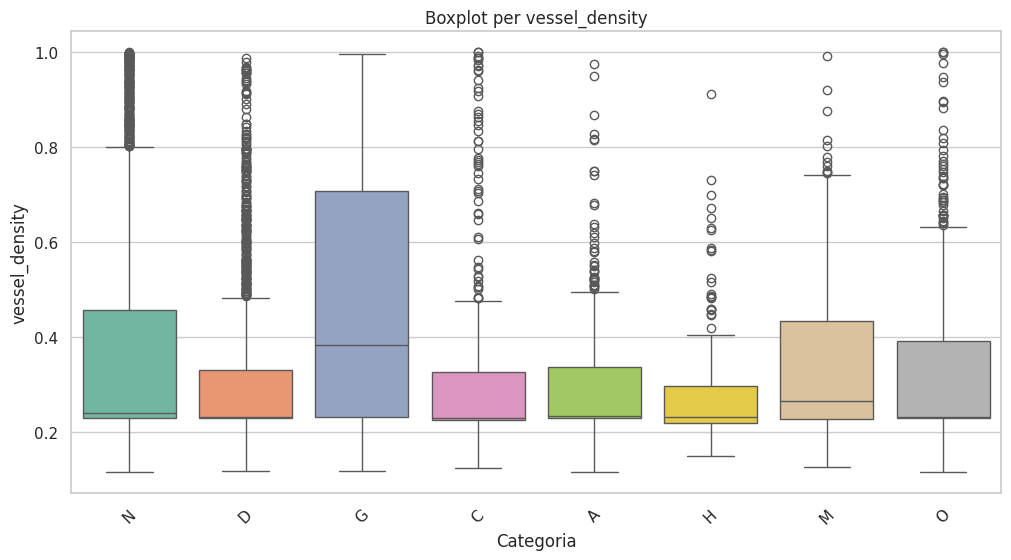

Confronto N vs D: stat=2541017.0000, p-value=2.6361e-08
 -> Differenza significativa tra N e D per vessel_density (p < 0.05)
Confronto N vs G: stat=316742.0000, p-value=4.8046e-10
 -> Differenza significativa tra N e G per vessel_density (p < 0.05)
Confronto N vs C: stat=492950.0000, p-value=1.3365e-06
 -> Differenza significativa tra N e C per vessel_density (p < 0.05)
Confronto N vs A: stat=418657.0000, p-value=9.7523e-03
 -> Differenza significativa tra N e A per vessel_density (p < 0.05)
Confronto N vs H: stat=217179.0000, p-value=5.1565e-04
 -> Differenza significativa tra N e H per vessel_density (p < 0.05)
Confronto N vs M: stat=342002.5000, p-value=5.0608e-01
 -> Nessuna differenza significativa tra N e M per vessel_density
Confronto N vs O: stat=1111798.5000, p-value=1.2032e-04
 -> Differenza significativa tra N e O per vessel_density (p < 0.05)


In [ ]:
results_MWU_vessel= []

analyze_channel(vessel_df, 'vessel_density', categories, results_MWU_vessel)


# Crea un DataFrame dai risultati
mwu_vessel_df = pd.DataFrame(results_MWU_vessel)

# Salva i risultati su un file CSV
mwu_vessel_df.to_csv("mwu_vessel_df.csv", index=False)

In [ ]:
files.download('mwu_vessel_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---

# DATAFRAME FEATURES ESTRATTE

In [ ]:
from google.colab import files

df_color = pd.merge(df_stats, df_stats_RGB, on='Image', how= 'inner')
df_color = df_color.drop(columns=['Category_y'])
print(df_color.head())
df_color.to_csv("color.csv", index=False)

  Category_x         Image     Mean_H  Median_H     Std_H  Skewness_H  \
0          N   0_right.jpg  16.913475      15.0  6.822023    1.726585   
1          N   1_right.jpg  13.811638      14.0  2.258315    2.749910   
2          N   8_right.jpg   7.395868       8.0  1.554694   31.917347   
3          N  10_right.jpg   9.870450       9.0  2.200385   13.161490   
4          N  29_right.jpg  15.313054      13.0  9.070848    7.928312   

    Kurtosis_H      Mean_S  Median_S      Std_S  ...      Mean_G  Median_G  \
0     3.905101  155.249933     164.0  31.676681  ...   53.431164      51.0   
1   236.923448  143.812435     144.0  13.386761  ...  116.269267     109.0   
2  3591.182163  191.862197     194.0  17.080136  ...   71.393789      63.0   
3   743.348668  154.426326     161.0  31.933013  ...  104.488106     101.0   
4   111.686707  126.893908     127.0  24.870426  ...   73.332529      72.0   

       Std_G  Skewness_G  Kurtosis_G     Mean_B  Median_B      Std_B  \
0   9.092319    0.21

In [ ]:
files.download("color.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_shape = pd.merge(shape_df, vessel_df, on='Image')
df_shape = df_shape.drop(columns=['Category_y'])
print(df_shape.head())

          Image Category_x  sobel_mean  sobel_std  canny_density  \
0   0_right.jpg          N    8.714341  24.502454       0.006882   
1   1_right.jpg          N   20.042303  40.030665       0.009018   
2   8_right.jpg          N   20.157983  32.926632       0.007198   
3  10_right.jpg          N   17.906068  46.288454       0.005718   
4  29_right.jpg          N   12.277896  41.909415       0.006874   

   vessel_density  
0        0.554722  
1        0.219913  
2        0.383724  
3        0.155235  
4        0.376652  


In [ ]:
df_texture = pd.merge(entropy_df, glcm_df, on='Image')
df_texture = df_texture.drop(columns=['Category_y'])
print(df_texture.head())

  Category_x         Image   Entropy  contrast_mean  correlation_mean  \
0          N   0_right.jpg  5.153260       0.035954          0.959683   
1          N   1_right.jpg  6.167973       0.145346          0.973464   
2          N   8_right.jpg  6.255137       0.127592          0.965374   
3          N  10_right.jpg  5.606169       0.147923          0.956655   
4          N  29_right.jpg  6.001006       0.106885          0.955098   

   energy_mean  homogeneity_mean  
0     0.632553          0.985023  
1     0.458642          0.943730  
2     0.444274          0.944903  
3     0.582288          0.956199  
4     0.493474          0.969732  


In [ ]:
df_features1 = pd.merge(df_color, df_shape, on='Image')
df_features1 = df_features1.drop(columns=['Category_x_y', 'Category_x_x'])
df_features = pd.merge(df_texture, df_features1, on='Image')
df_features.rename(columns={'Category_x': 'Category'}, inplace=True)

print(df_features.head())
df_features.to_csv("features.csv", index=False)

  Category         Image   Entropy  contrast_mean  correlation_mean  \
0        N   0_right.jpg  5.153260       0.035954          0.959683   
1        N   1_right.jpg  6.167973       0.145346          0.973464   
2        N   8_right.jpg  6.255137       0.127592          0.965374   
3        N  10_right.jpg  5.606169       0.147923          0.956655   
4        N  29_right.jpg  6.001006       0.106885          0.955098   

   energy_mean  homogeneity_mean     Mean_H  Median_H     Std_H  ...  \
0     0.632553          0.985023  16.913475      15.0  6.822023  ...   
1     0.458642          0.943730  13.811638      14.0  2.258315  ...   
2     0.444274          0.944903   7.395868       8.0  1.554694  ...   
3     0.582288          0.956199   9.870450       9.0  2.200385  ...   
4     0.493474          0.969732  15.313054      13.0  9.070848  ...   

   Kurtosis_G     Mean_B  Median_B      Std_B  Skewness_B  Kurtosis_B  \
0    6.020713  29.151191      28.0   5.719399    0.903760    7.3275

In [ ]:
files.download("features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---

# ANALISI DELLA POTENZA
# CALCOLO DELLA DIMENSIONE CAMPIONARIA

In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower
mwu_df =[mwu_HSV_df ,mwu_RGB_df ,mwu_entropy_df , mwu_glcm_df , mwu_shape_df , mwu_vessel_df]
channels_features =channels_HSV + channels_RGB + channels_glcm + channels_shape + ['vessel_density'] + ['Entropy']

# Funzione per calcolare il numero minimo di immagini per ottenere un risultato significativo
def calculate_sample_size(effect_size, alpha=0.05, power=0.80):
    # TTestIndPower può essere usato per calcolare la dimensione del campione
    analysis = TTestIndPower()
    sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
    return int(np.ceil(sample_size))


for df in mwu_df:
  for channel in channels_features:
    channel_data = df[df['Channel'] == channel]  # Adatta il nome della colonna 'Channel'
    # Filtra categorie significative
    significant_categories = channel_data.loc[channel_data['P-value'] < 0.05, 'Comparison'].tolist()
    if significant_categories:
      print(f"Feature {channel} ha differenze significative nelle seguenti categorie: {significant_categories}")
      # Calcolo della dimensione del campione per 3 categorie selezionate
    for category in significant_categories:
      effect_size = 0.5
      sample_size = calculate_sample_size(effect_size)
      print(f"Numero minimo di immagini per rilevare una differenza significativa per {channel} tra {category}: {sample_size} immagini")


Feature Mean_H ha differenze significative nelle seguenti categorie: ['N vs D', 'N vs C', 'N vs H', 'N vs M', 'N vs O']
Numero minimo di immagini per rilevare una differenza significativa per Mean_H tra N vs D: 64 immagini
Numero minimo di immagini per rilevare una differenza significativa per Mean_H tra N vs C: 64 immagini
Numero minimo di immagini per rilevare una differenza significativa per Mean_H tra N vs H: 64 immagini
Numero minimo di immagini per rilevare una differenza significativa per Mean_H tra N vs M: 64 immagini
Numero minimo di immagini per rilevare una differenza significativa per Mean_H tra N vs O: 64 immagini
Feature Mean_S ha differenze significative nelle seguenti categorie: ['N vs D', 'N vs C', 'N vs M', 'N vs O']
Numero minimo di immagini per rilevare una differenza significativa per Mean_S tra N vs D: 64 immagini
Numero minimo di immagini per rilevare una differenza significativa per Mean_S tra N vs C: 64 immagini
Numero minimo di immagini per rilevare una differ

In [ ]:
# Funzione aggiornata per calcolare Cohen's d (effect size dinamico)
def calculate_effect_size(group1, group2):
    mean_diff = abs(np.mean(group1) - np.mean(group2))
    pooled_std = np.sqrt(((np.std(group1, ddof=1) ** 2) + (np.std(group2, ddof=1) ** 2)) / 2)
    if pooled_std == 0:  # Per evitare divisioni per zero
        return 0
    return mean_diff / pooled_std

# Lista per immagazzinare i risultati
dynamic_results = []

for feature in channels_features:
    feature_results = {"Feature": feature, "Comparisons": []}

    for cat1 in categories:
        for cat2 in categories:
            if cat1 != cat2 and cat1 == 'N':
                # Filtrare i dati per le due categorie
                group1 = df_features.loc[df_features['Category'] == cat1, feature].dropna()
                group2 = df_features.loc[df_features['Category'] == cat2, feature].dropna()

                # Calcolare l'effect size dinamico
                effect_size = calculate_effect_size(group1, group2)

                # Evitare confronti senza dati sufficienti
                if len(group1) > 1 and len(group2) > 1 and effect_size > 0:
                    # Calcolo della dimensione campionaria minima
                    sample_size = calculate_sample_size(effect_size)

                    # Mann-Whitney U Test
                    _, p_value_mwu = mannwhitneyu(group1, group2, alternative='two-sided')

                    feature_results["Comparisons"].append({
                        "Category1": cat1,
                        "Category2": cat2,
                        "EffectSize": effect_size,
                        "MWU_PValue": p_value_mwu,
                        "MinSampleSize": sample_size
                    })

    dynamic_results.append(feature_results)

dynamic_results[:3]  # Mostrare i primi risultati per esempio


[{'Feature': 'Mean_H',
  'Comparisons': [{'Category1': 'N',
    'Category2': 'D',
    'EffectSize': 0.04658402265728141,
    'MWU_PValue': 0.02646226964381371,
    'MinSampleSize': 7235},
   {'Category1': 'N',
    'Category2': 'G',
    'EffectSize': 0.17479096671856117,
    'MWU_PValue': 0.148187010413712,
    'MinSampleSize': 515},
   {'Category1': 'N',
    'Category2': 'C',
    'EffectSize': 0.37727542998786223,
    'MWU_PValue': 3.274170054290951e-16,
    'MinSampleSize': 112},
   {'Category1': 'N',
    'Category2': 'A',
    'EffectSize': 0.049002531902313504,
    'MWU_PValue': 0.591182837114935,
    'MinSampleSize': 6539},
   {'Category1': 'N',
    'Category2': 'H',
    'EffectSize': 0.02527809280843942,
    'MWU_PValue': 0.016090107944924943,
    'MinSampleSize': 24568},
   {'Category1': 'N',
    'Category2': 'M',
    'EffectSize': 0.20093054622811718,
    'MWU_PValue': 0.0025394973789024237,
    'MinSampleSize': 390},
   {'Category1': 'N',
    'Category2': 'O',
    'EffectSize': 